# Apresentação dos Dados

## Importação das bibliotecas necessárias

In [49]:
import fastf1
from fastf1 import plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter, MultipleLocator
import json

CACHE_DIR = './fastf1_cache'
if not os.path.exists(CACHE_DIR):
    os.makedirs(CACHE_DIR)
print(f"FastF1 cache enabled at: {os.path.abspath(CACHE_DIR)}")


BASE_PLOT_DIR = './f1_plots'
if not os.path.exists(BASE_PLOT_DIR):
    os.makedirs(BASE_PLOT_DIR)
print(f"Base directory for saving plots: {os.path.abspath(BASE_PLOT_DIR)}")

COMPOUND_COLORS = fastf1.plotting.COMPOUND_COLORS


FastF1 cache enabled at: c:\Users\mpoli\Desktop\UFOP\9 PERIODO\TCC\Scripts\fastf1_cache
Base directory for saving plots: c:\Users\mpoli\Desktop\UFOP\9 PERIODO\TCC\Scripts\f1_plots


C:\Users\mpoli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\plotting\__init__.py:84: FutureWarning: INCOMPATIBLE with 2025 season! COMPOUND_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"INCOMPATIBLE with 2025 season! {name} is deprecated "


## Escolha dos Dados

Aqui, escolhemos recolher os dados apenas de uma única pista, o grande prêmio do Bahrein. É uma pista que tem um asfalto abrasivo, pneus mais duros e nenhum incidência de chuva. Tem uma grande variação de corridas com e sem safety car e é uma boa pista para ultrapassagem, além de ter participado do calendário em todos esses anos.

Separamos os dados em resultados, voltas e climáticos.

In [50]:
start_year_analysis = 2019
end_year_analysis = 2026
target_gp_name = 'Spanish Grand Prix'

all_results_data_by_year = {}
all_laps_data_by_year = {}
all_weather_data_by_year = {}
date = {}


print(f"\n--- Starting comprehensive data collection for {target_gp_name} from {start_year_analysis} to {end_year_analysis-1} ---")

for year in range(start_year_analysis, end_year_analysis):
    print(f"\n--- Collecting data for {target_gp_name} in Season: {year} ---")
    schedule = fastf1.get_event_schedule(year)
    target_event = schedule[schedule['EventName'].str.contains(target_gp_name, case=False, na=False)]

    if target_event.empty:
        print(f"  {target_gp_name} not found in {year} schedule, skipping.")
        continue
    
    target_race_round_row = target_event[target_event['EventFormat'].isin(['conventional', 'sprint'])]
        
    if target_race_round_row.empty:
        print(f"  No 'conventional' or 'sprint' race event found for {target_gp_name} in {year}, skipping.")
        continue

    round_num = target_race_round_row['RoundNumber'].iloc[0]
    actual_event_name = target_race_round_row['EventName'].iloc[0] 

    print(f"  Found {actual_event_name} as Round {round_num} in {year}. Loading session...")

    session = fastf1.get_session(year, round_num, 'R') 
    session.load(laps=True, telemetry=True, weather=True, messages=True)

    laps_df = session.laps.copy()
    results_df = session.results.copy()
    
    if 'LapTime_seconds' not in laps_df.columns:
        laps_df['LapTime_seconds'] = laps_df['LapTime'].dt.total_seconds()

    race_name = session.event['EventName']
    json_path = 'compounds.json'
    with open(json_path, 'r') as file:
        compounds_data = json.load(file)
    
    year_str = str(year)
    
    if year_str in compounds_data['data']:
        compounds_for_year = compounds_data['data'][year_str]
        gp_compound_mapping = compounds_for_year.get(target_gp_name)

        if gp_compound_mapping:
            laps_df['pirelliCompound'] = laps_df['Compound'].map(gp_compound_mapping)
            
            laps_df['pirelliCompound'] = laps_df['pirelliCompound'].fillna(laps_df['Compound'])
            
            print(f" 'pirelliCompound' column created for {target_gp_name} {year}.")

        else:
            print(f" Warning: No compound mapping found in JSON for '{target_gp_name}' in year {year}. 'pirelliCompound' not created.")
    else:
        print(f" Warning: Year {year} not found in 'compounds.json'. 'pirelliCompound' not created.")
        laps_df['pirelliCompound'] = laps_df['Compound']

    all_results_data_by_year[year] = results_df
    all_laps_data_by_year[year] = laps_df
    all_weather_data_by_year[year] = session.weather_data
    date[year]= session.date
    
    print(f"Session data loaded for: {race_name} {year} Round {round_num}")
    print(f"Total laps: {len(laps_df)}, Total results: {len(results_df)}")



--- Starting comprehensive data collection for Spanish Grand Prix from 2019 to 2025 ---

--- Collecting data for Spanish Grand Prix in Season: 2019 ---
  Found Spanish Grand Prix as Round 5 in 2019. Loading session...


core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '77', '33', '5', '16', '10', '20', '55', '26', '8', '23', '3

 'pirelliCompound' column created for Spanish Grand Prix 2019.
Session data loaded for: Spanish Grand Prix 2019 Round 5
Total laps: 1276, Total results: 20

--- Collecting data for Spanish Grand Prix in Season: 2020 ---
  Found Spanish Grand Prix as Round 6 in 2020. Loading session...


core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.071000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '18', '11', '55', '5', '23', '10', '4', '3', '26

 'pirelliCompound' column created for Spanish Grand Prix 2020.
Session data loaded for: Spanish Grand Prix 2020 Round 6
Total laps: 1274, Total results: 20

--- Collecting data for Spanish Grand Prix in Season: 2021 ---
  Found Spanish Grand Prix as Round 4 in 2021. Loading session...


core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 44 completed the race distance 00:00.083000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '11', '3', '55', '4', '31', '10', '18', '7

 'pirelliCompound' column created for Spanish Grand Prix 2021.
Session data loaded for: Spanish Grand Prix 2021 Round 4
Total laps: 1247, Total results: 20

--- Collecting data for Spanish Grand Prix in Season: 2022 ---
  Found Spanish Grand Prix as Round 6 in 2022. Loading session...


core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '63', '55', '44', '77', '31', '4', '14', '22', '5', '3', '10', '47', '18', '6', '20', '23', '24', '16']


 'pirelliCompound' column created for Spanish Grand Prix 2022.
Session data loaded for: Spanish Grand Prix 2022 Round 6
Total laps: 1230, Total results: 20

--- Collecting data for Spanish Grand Prix in Season: 2023 ---
  Found Spanish Grand Prix as Round 7 in 2023. Loading session...


core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.037000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '18', '14', '31', '24', '10', '16', '2

 'pirelliCompound' column created for Spanish Grand Prix 2023.
Session data loaded for: Spanish Grand Prix 2023 Round 7
Total laps: 1312, Total results: 20

--- Collecting data for Spanish Grand Prix in Season: 2024 ---
  Found Spanish Grand Prix as Round 10 in 2024. Loading session...


req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.015000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '63', '16', '55', '81', '11', '10', '31', '27', '14', '24', '18', '3', '77', '20', '23', '22', '2']
core           INFO 	Loa

 'pirelliCompound' column created for Spanish Grand Prix 2024.
Session data loaded for: Spanish Grand Prix 2024 Round 10
Total laps: 1310, Total results: 20

--- Collecting data for Spanish Grand Prix in Season: 2025 ---
  Found Spanish Grand Prix as Round 9 in 2025. Loading session...


req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['81', '4', '16', '63', '27', '44', '6', '10', '14', '1', '30', '5', '22', '55', '43', '31', '87', '12', '23']


 'pirelliCompound' column created for Spanish Grand Prix 2025.
Session data loaded for: Spanish Grand Prix 2025 Round 9
Total laps: 1203, Total results: 19


## Análise das variavéis presentes nas voltas de cada piloto

Para limpar algumas voltas, utilizamos a coluna 'isAccurate' da biblioteca, que limpa voltas de entrada e saída do pit, voltas de VSC e SC, além de largadas. Em geral, voltas muito lentas.

In [51]:
print("Iniciando coleta de dados de múltiplos anos...")
lista_de_dataframes_anuais_laps = []
lista_de_dataframes_anuais_weather = []

for year in range(start_year_analysis, end_year_analysis):
    if year in all_laps_data_by_year:
        print(f"Carregando dados de {target_gp_name} {year}...")
        laps_df = all_laps_data_by_year[year]
        weather_df = all_weather_data_by_year[year]
        weather_df['Year'] = year
        laps_df['Year'] = year 
        
        lista_de_dataframes_anuais_laps.append(laps_df)
        lista_de_dataframes_anuais_weather.append(weather_df)
    else:
        print(f"Sem dados para {target_gp_name} {year}.")

if not lista_de_dataframes_anuais_laps:
    print("Nenhum dado encontrado para o intervalo de anos. Encerrando a análise.")
else:
    combined_laps_df = pd.concat(lista_de_dataframes_anuais_laps, ignore_index=True)
    print(f"\nDados de {len(lista_de_dataframes_anuais_laps)} anos combinados com sucesso!")
    print(f"Total de {len(combined_laps_df)} voltas carregadas.")
    # O isAccurate do FASTF1 diz se essa volta é uma volta válida, tirando voltas de voltas lentas (largada, SC, Pitstops, etc)
    clean_laps_df = combined_laps_df[combined_laps_df['IsAccurate'] == True].copy()
    clean_laps_df.dropna(subset=['LapTime_seconds', 'TyreLife', 'pirelliCompound'], inplace=True)

    print(f"Analisando {len(clean_laps_df)} voltas 'limpas' de todos os anos.")
    
    
    clean_laps_df['Year'] = clean_laps_df['Year'].astype('category')
    
    print(f"Total de {len(clean_laps_df)} voltas 'limpas' para análise.")

if not lista_de_dataframes_anuais_weather:
    print("Nenhum dado meteorológico encontrado para o intervalo de anos. Encerrando a análise.")
else:
    combined_weather_df = pd.concat(lista_de_dataframes_anuais_weather, ignore_index=True)
    print(f"\nDados de {len(lista_de_dataframes_anuais_weather)} anos combinados com sucesso!")
    print(f"Total de {len(combined_weather_df)} registros meteorológicos carregados.")

    

Iniciando coleta de dados de múltiplos anos...
Carregando dados de Spanish Grand Prix 2019...
Carregando dados de Spanish Grand Prix 2020...
Carregando dados de Spanish Grand Prix 2021...
Carregando dados de Spanish Grand Prix 2022...
Carregando dados de Spanish Grand Prix 2023...
Carregando dados de Spanish Grand Prix 2024...
Carregando dados de Spanish Grand Prix 2025...

Dados de 7 anos combinados com sucesso!
Total de 8852 voltas carregadas.
Analisando 7859 voltas 'limpas' de todos os anos.
Total de 7859 voltas 'limpas' para análise.

Dados de 7 anos combinados com sucesso!
Total de 1018 registros meteorológicos carregados.


### Análise da correlação entre as variáveis númericas

É interessante, para a nossa análise, ter duas colunas em cada linha, uma já informando o tempo de volta daquela volta e outra informando o tempo da volta anterior. Dessa forma, podemos ver como essa correlação influencia e se conseguimos ter uma boa base da próxima volta com esses dados.


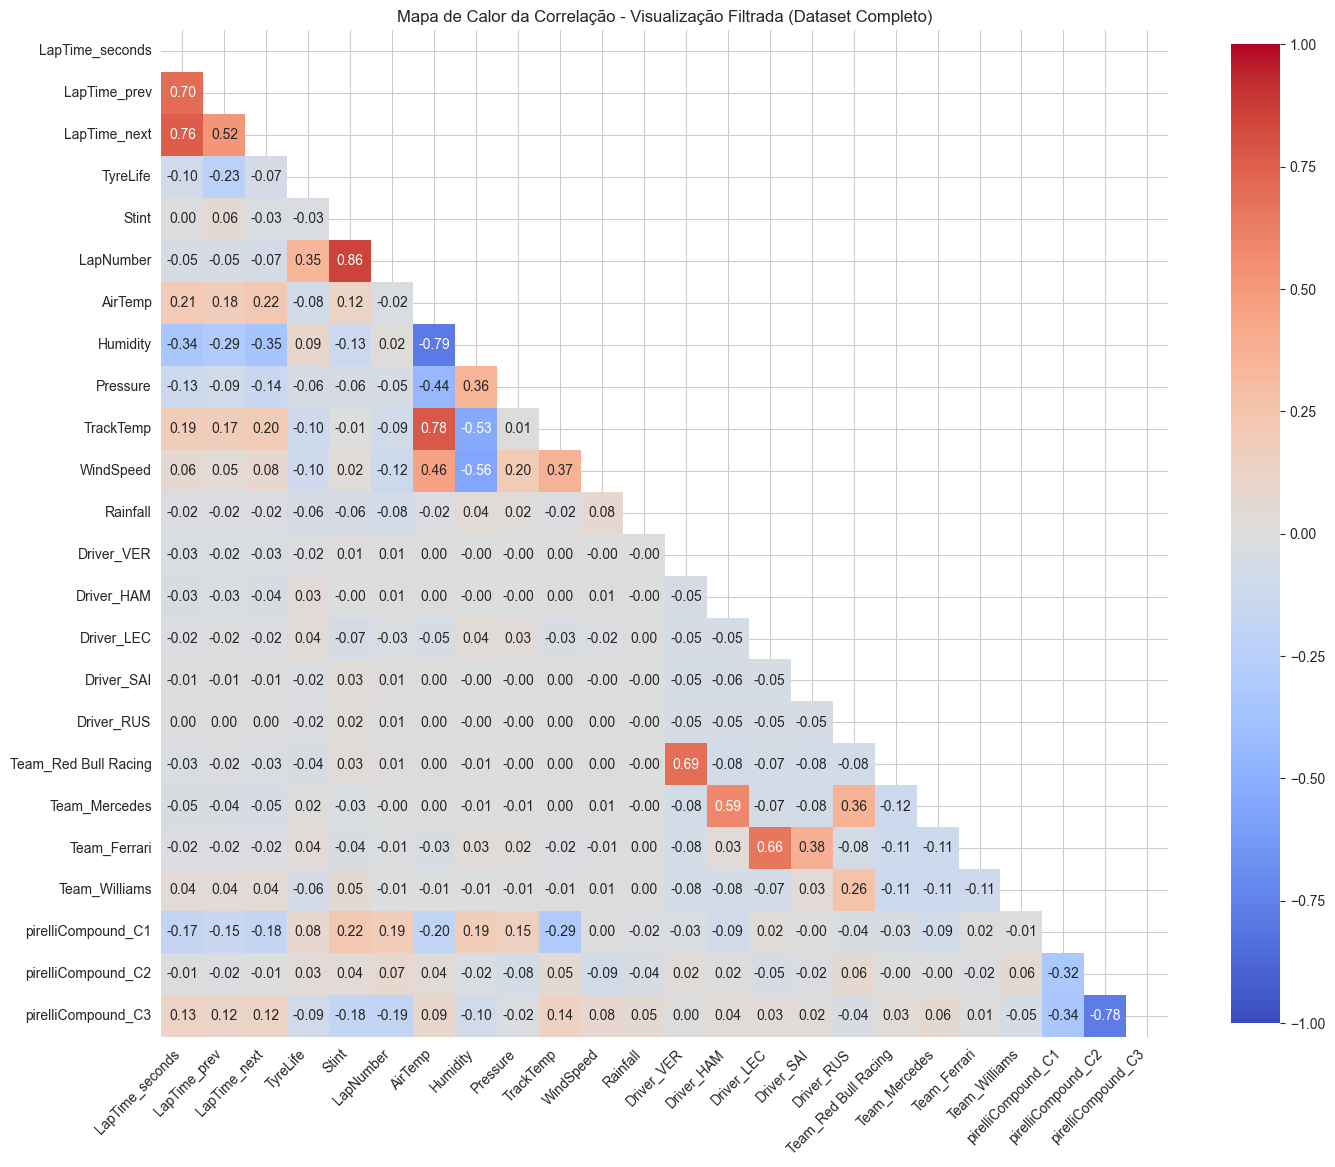

In [52]:
# combined_laps_df para todas as voltas, incluindo voltas lentas e não precisas
# clean_laps_df para apenas voltas precisas e puras (IsAccurate == True)


combined_laps_df = combined_laps_df.sort_values(['Year','Driver','Stint','LapNumber'])
combined_laps_df['LapTime_prev'] = combined_laps_df.groupby(['Year','Driver','Stint'])['LapTime_seconds'].shift(1)
combined_laps_df['LapTime_next'] = combined_laps_df.groupby(['Year','Driver','Stint'])['LapTime_seconds'].shift(-1)

combined_laps_df_filtered = combined_laps_df.sort_values('Time').reset_index(drop=True)

combined_weather_df = combined_weather_df.sort_values('Time').reset_index(drop=True)
combined_weather_df = combined_weather_df.sort_values('Year').reset_index(drop=True)


weather_df_filtered = combined_weather_df.copy()

combined_laps_df_filtered['Year'] = combined_laps_df_filtered['Year'].astype(int)
weather_df_filtered['Year'] = weather_df_filtered['Year'].astype(int)

combined_laps_df_filtered = combined_laps_df_filtered.sort_values(['Year', 'Time']).reset_index(drop=True)
weather_df_filtered = weather_df_filtered.sort_values(['Year', 'Time']).reset_index(drop=True)

combined_laps_df_filtered = combined_laps_df_filtered.sort_values('Time')
weather_df_filtered = weather_df_filtered.sort_values('Time')

seconds_margin = 60
laps_with_weather = pd.merge_asof(
    combined_laps_df_filtered,
    weather_df_filtered.drop_duplicates(subset=['Time', 'Year']),
    on='Time',
    by='Year',
    direction='backward',
    tolerance=pd.Timedelta(seconds=seconds_margin)
)


num_cols = [
    'LapTime_seconds', 'LapTime_prev', 'LapTime_next', 'Stint', 'TyreLife', 'LapNumber', 'Year',
    'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed', 'TrackStatus',
]

cat_cols = ['Driver', 'pirelliCompound', 'Team']

cat_dummies = pd.get_dummies(laps_with_weather[cat_cols], prefix=cat_cols)

num_df = laps_with_weather[num_cols].copy()
corr_df_full = pd.concat([num_df, cat_dummies], axis=1)

corr_df_clean = corr_df_full.dropna()

if corr_df_clean.empty or corr_df_clean.shape[1] <= 1:
    print("Nenhum dado completo disponível para gerar a matriz de correlação.")
else:
    corr_matrix = corr_df_clean.corr(method='pearson')
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    cols_to_display = [
        'LapTime_seconds', 'LapTime_prev', 'LapTime_next', 'TyreLife', 'Stint', 'LapNumber',
        'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed', 'Rainfall',
        'Driver_VER', 'Driver_HAM', 'Driver_LEC', 'Driver_SAI', 'Driver_RUS',
        'Team_Red Bull Racing', 'Team_Mercedes', 'Team_Ferrari', 'Team_Williams',
        'pirelliCompound_C1', 'pirelliCompound_C2', 'pirelliCompound_C3', 'pirelliCompound_C4',
        'pirelliCompound_INTERMEDIATE'
    ]

    # Filtra apenas as colunas que realmente existem no dataset
    cols_to_display = [c for c in cols_to_display if c in corr_matrix.columns]
    corr_subset = corr_matrix.loc[cols_to_display, cols_to_display]

    plt.figure(figsize=(max(10, len(cols_to_display)*0.6), max(6, len(cols_to_display)*0.6)))
    ax = sns.heatmap(
        corr_subset, annot=True, cmap='coolwarm', fmt='.2f',
        vmin=-1, vmax=1, cbar_kws={'shrink':0.7}, square=True, mask=np.triu(np.ones_like(corr_subset, dtype=bool))
    )

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    plt.title('Mapa de Calor da Correlação - Visualização Filtrada (Dataset Completo)')
    plt.tight_layout()
    plt.show()

## Histogramas para Features Númericas

Histogramas contínuos salvos em: continuous_histograms.png


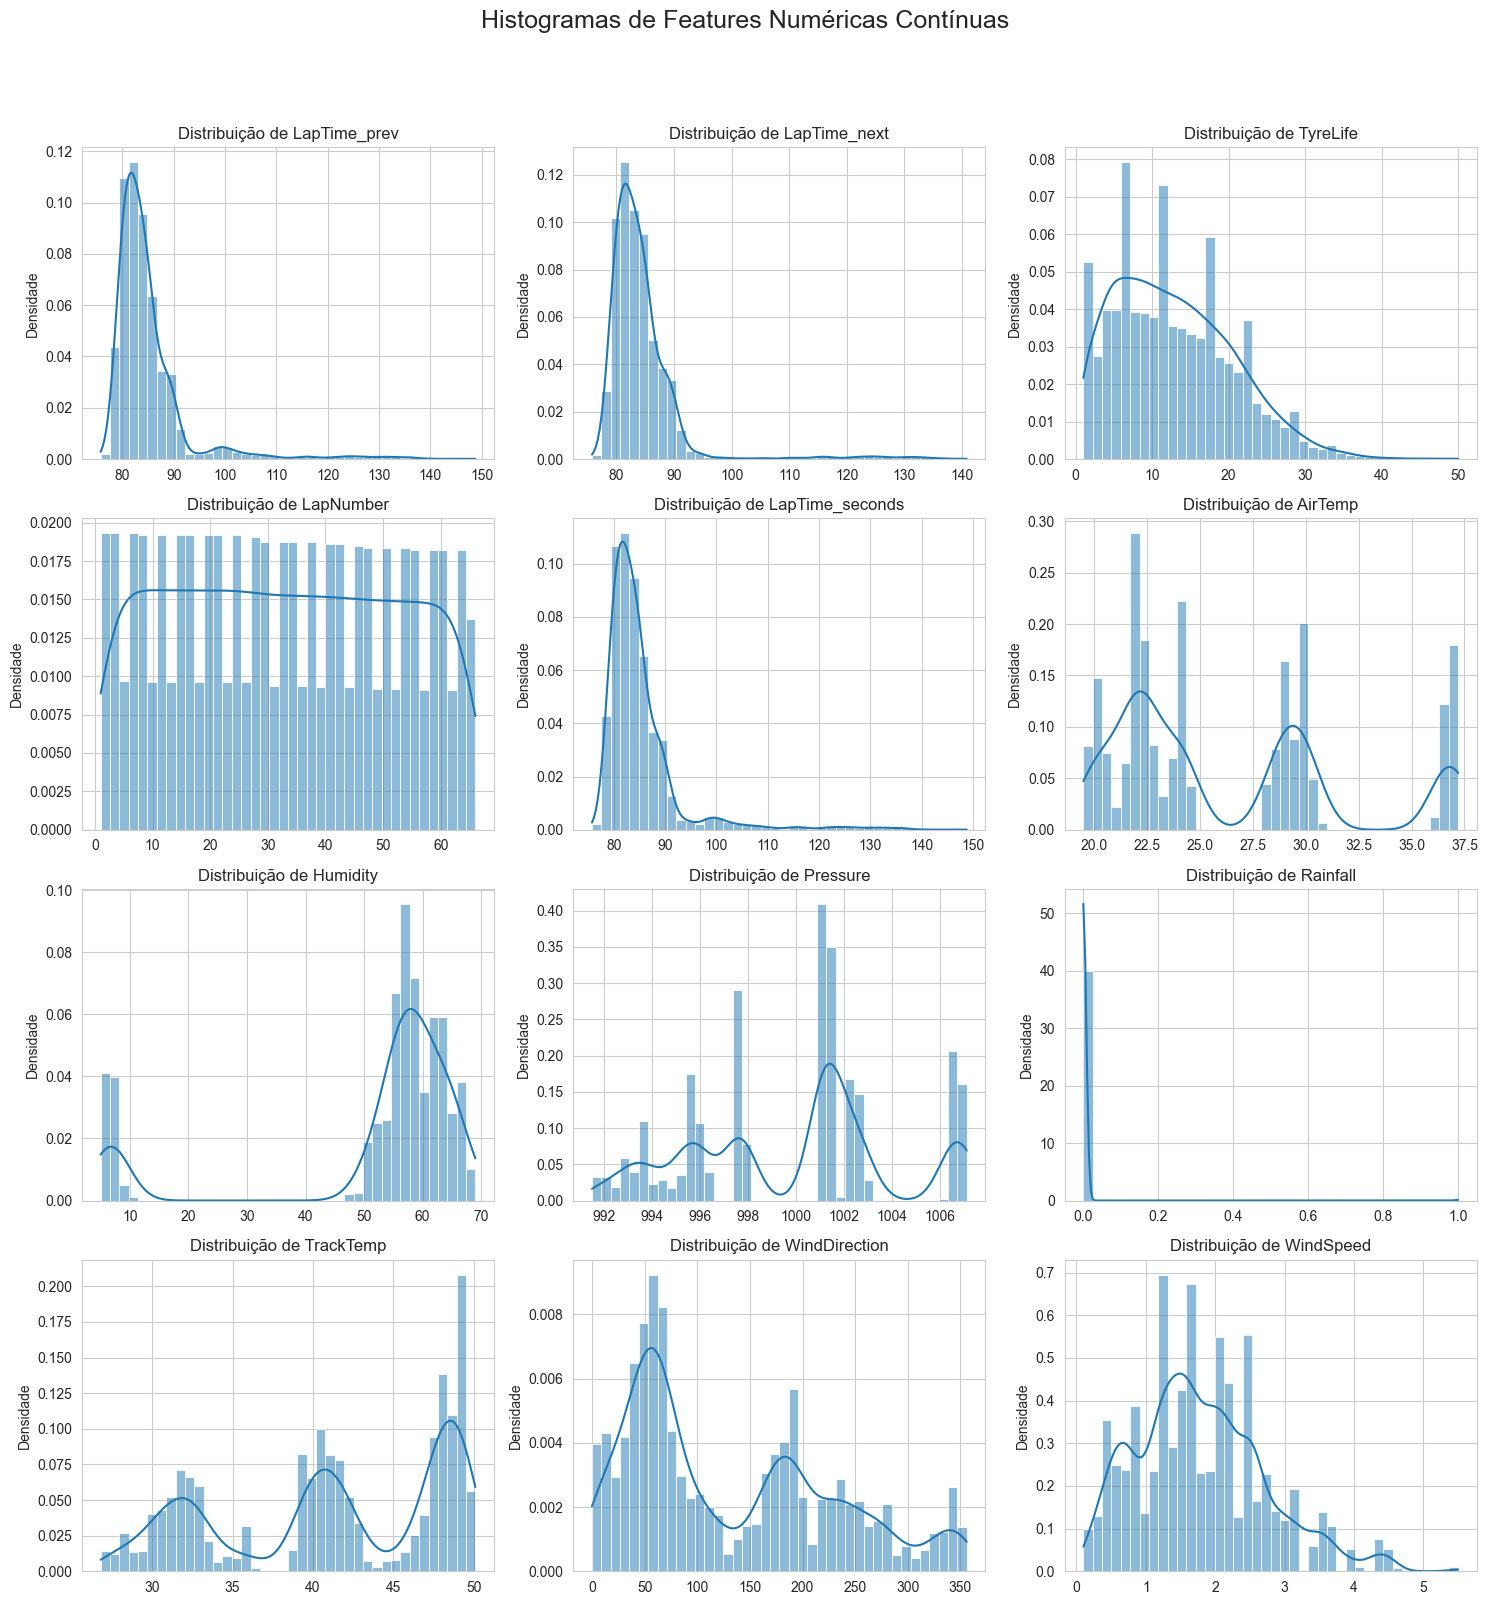

In [53]:
n_rows_cont = 4
n_cols_cont = 3
fig_cont, axes_cont = plt.subplots(n_rows_cont, n_cols_cont, figsize=(15, 16))
flat_axes_cont = axes_cont.flatten() 

sns.set_style("whitegrid")

continuous_cols = [
    'LapTime_prev', 'LapTime_next', 'TyreLife', 'LapNumber', 'LapTime_seconds',
    'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed',
]

num_df = laps_with_weather[continuous_cols].copy()

for i, col in enumerate(continuous_cols):
    ax = flat_axes_cont[i]
    
    # Remove NaNs apenas para esta coluna, para não perder dados
    data_to_plot = num_df[col].dropna()
    
    if data_to_plot.empty:
        ax.set_title(f'{col} (Sem Dados)')
        ax.text(0.5, 0.5, 'Sem Dados', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_xticks([]); ax.set_yticks([])
    else:
        # kde=True adiciona a linha de estimativa de densidade
        sns.histplot(data_to_plot, kde=True, ax=ax, bins=40, stat="density") 
        ax.set_title(f'Distribuição de {col}')
        ax.set_xlabel('')
        ax.set_ylabel('Densidade') # Alterado para Densidade por causa do kde

plt.suptitle('Histogramas de Features Numéricas Contínuas', fontsize=18, y=1.03)
plt.tight_layout(rect=[0, 0.03, 1, 0.99])

# Salvar a figura
plot_filename_cont = 'continuous_histograms.png'
plt.savefig(plot_filename_cont)
print(f"Histogramas contínuos salvos em: {plot_filename_cont}")

São features multimodais: AirTemp, Humidity, WindDirection, WindSpeed, Pressure.

O restante não é, com exceção talvez de TyreLife.

CDFs contínuos salvos em: continuous_cdfs.png


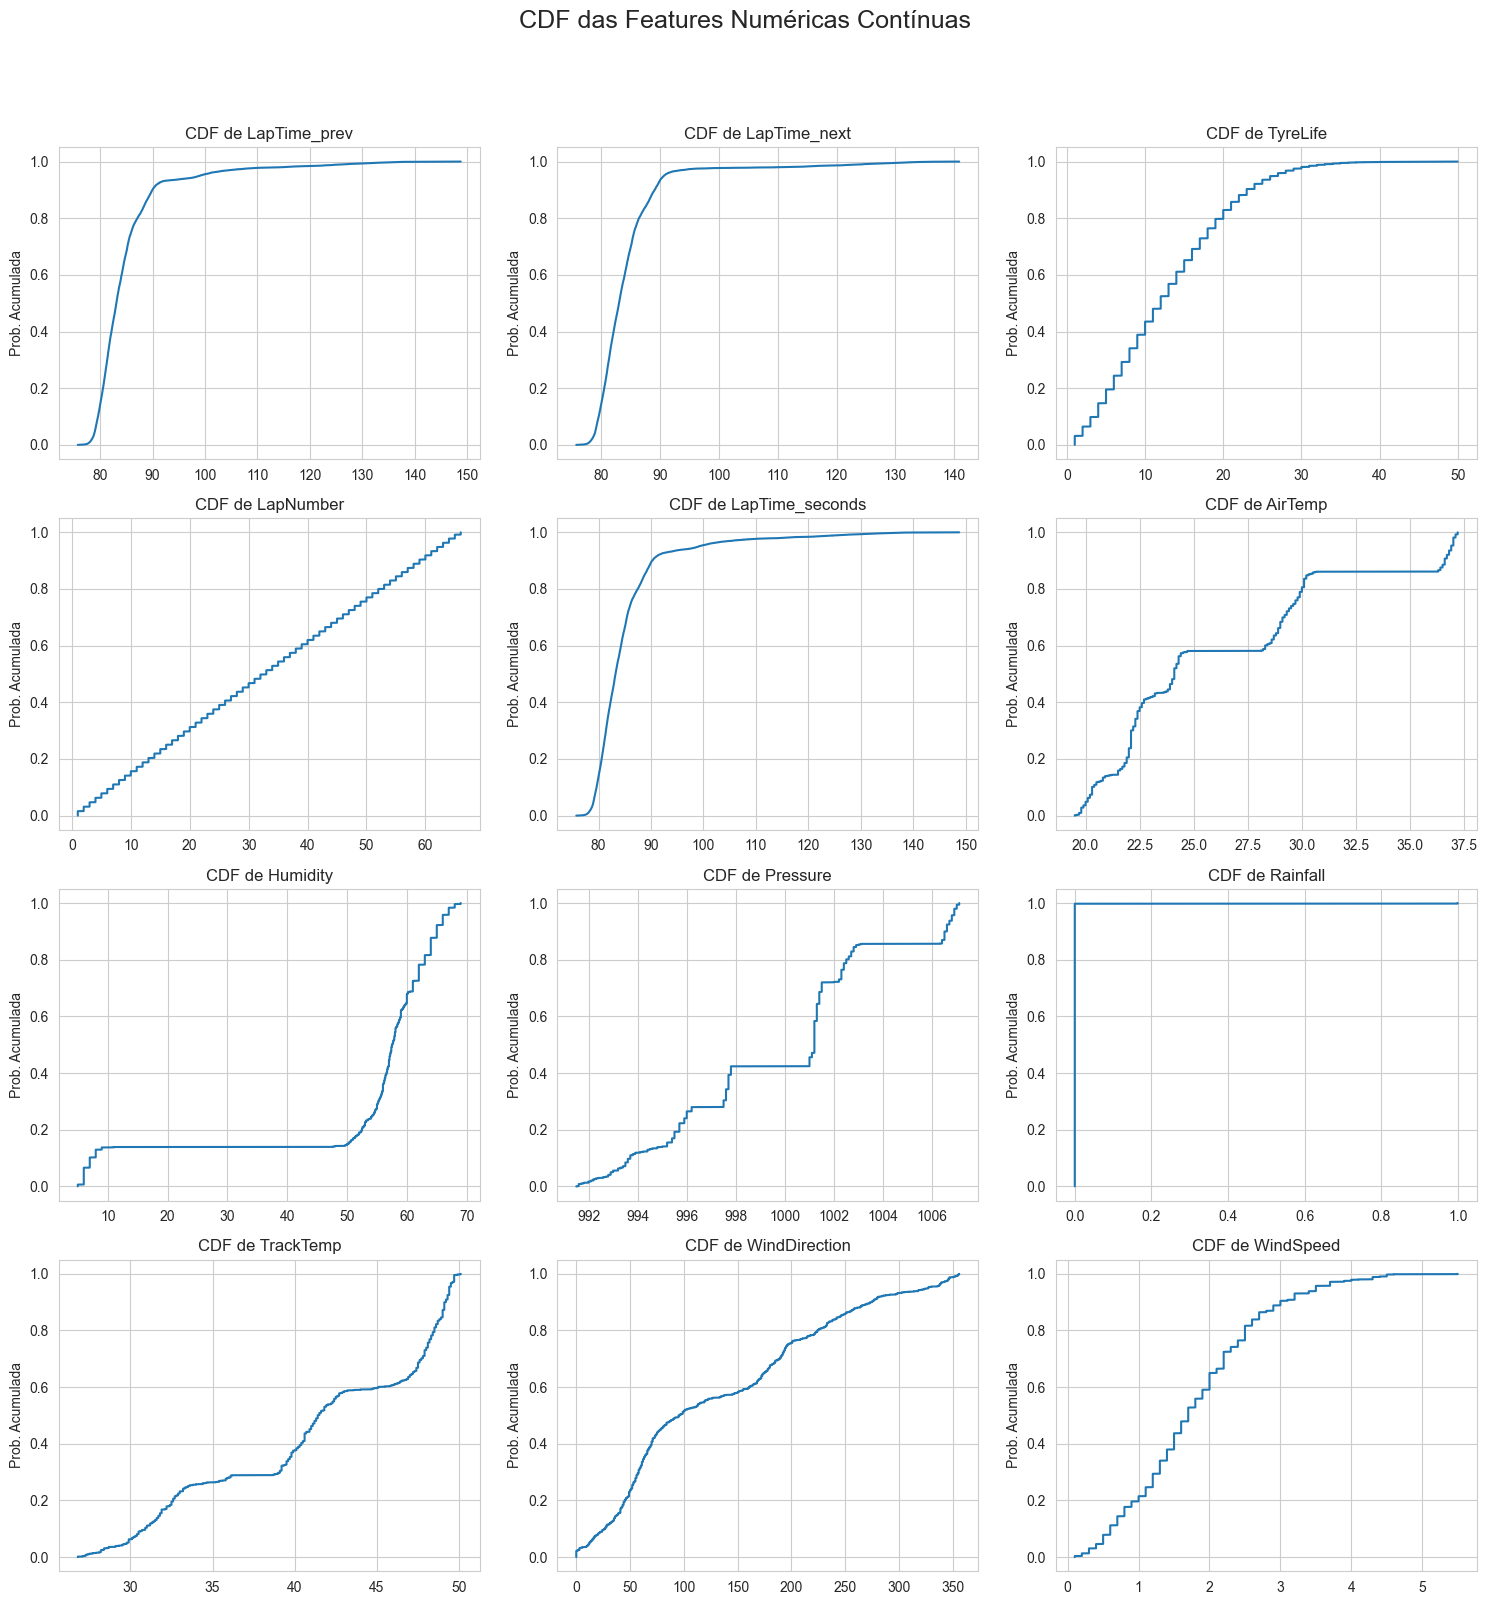

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mesma organização usada nos histogramas
n_rows_cont = 4
n_cols_cont = 3
fig_cdf, axes_cdf = plt.subplots(n_rows_cont, n_cols_cont, figsize=(15, 16))
flat_axes_cdf = axes_cdf.flatten()

sns.set_style("whitegrid")

continuous_cols = [
    'LapTime_prev', 'LapTime_next', 'TyreLife', 'LapNumber', 'LapTime_seconds',
    'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed',
]

num_df = laps_with_weather[continuous_cols].copy()

for i, col in enumerate(continuous_cols):
    ax = flat_axes_cdf[i]

    # Remove NaNs
    data_to_plot = num_df[col].dropna()

    if data_to_plot.empty:
        ax.set_title(f'{col} (Sem Dados)')
        ax.text(0.5, 0.5, 'Sem Dados', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_xticks([]); ax.set_yticks([])
    else:
        # Ordena os valores para calcular o CDF
        sorted_vals = np.sort(data_to_plot)
        cdf_vals = np.arange(1, len(sorted_vals)+1) / len(sorted_vals)

        ax.plot(sorted_vals, cdf_vals)
        ax.set_title(f'CDF de {col}')
        ax.set_xlabel('')
        ax.set_ylabel('Prob. Acumulada')

plt.suptitle('CDF das Features Numéricas Contínuas', fontsize=18, y=1.03)
plt.tight_layout(rect=[0, 0.03, 1, 0.99])

# Salvar a figura
plot_filename_cdf = 'continuous_cdfs.png'
plt.savefig(plot_filename_cdf)
print(f"CDFs contínuos salvos em: {plot_filename_cdf}")


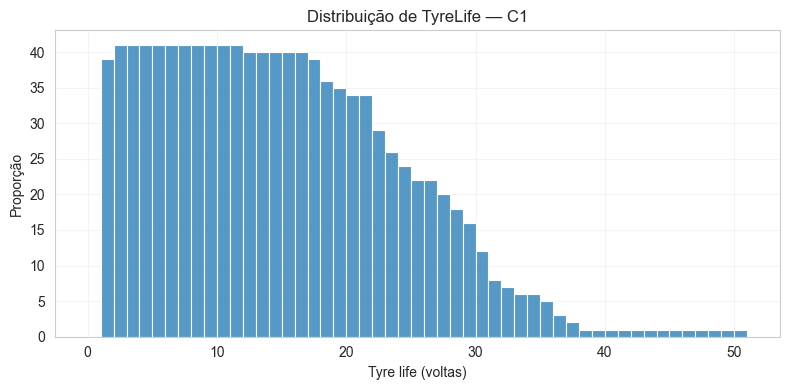

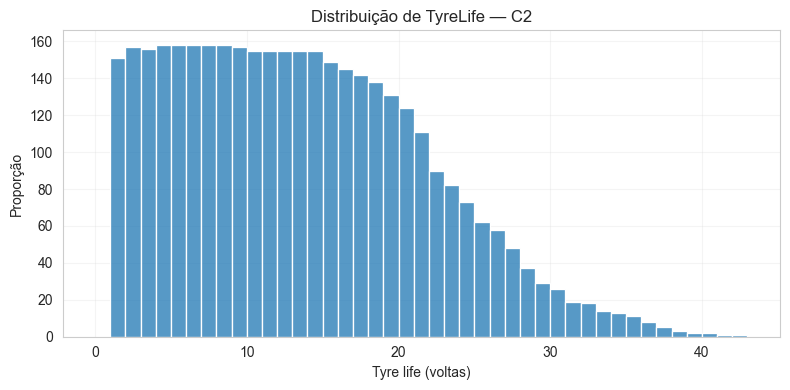

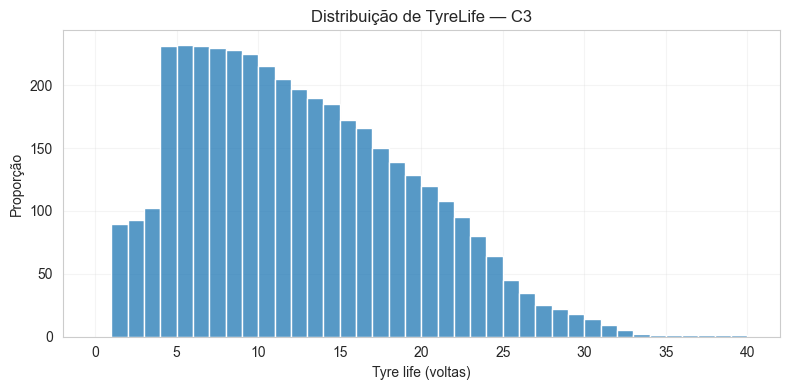

In [55]:
compounds_to_plot = ['C1', 'C2', 'C3']

for comp in compounds_to_plot:
    if 'pirelliCompound' in laps_with_weather.columns:
        subset = laps_with_weather[laps_with_weather['pirelliCompound'] == comp]
    elif 'Compound' in laps_with_weather.columns:
        subset = laps_with_weather[laps_with_weather['Compound'] == comp]
    else:
        subset = laps_with_weather[laps_with_weather.get('compound') == comp] if 'compound' in laps_with_weather.columns else laps_with_weather[[]]

    if subset.empty:
        print(f'Nenhum dado disponível para o composto {comp}. Pulando.')
        continue

    tyre_life = subset['TyreLife'].dropna()
    if tyre_life.empty:
        print(f'Nenhum TyreLife válido para {comp}. Pulando.')
        continue

    max_life = int(tyre_life.max()) if pd.api.types.is_numeric_dtype(tyre_life) else tyre_life.max()
    bins = range(0, max(2, max_life + 2)) if isinstance(max_life, int) else 10

    plt.figure(figsize=(8,4))
    sns.histplot(tyre_life, bins=bins, kde=False, color='C0', stat='count')
    plt.title(f'Distribuição de TyreLife — {comp}')
    plt.xlabel('Tyre life (voltas)')
    plt.ylabel('Proporção')
    plt.grid(alpha=0.2)
    plt.tight_layout()
    plt.show()


## Frequência das Features Categóricas



Gerando gráficos de frequência (Countplots) para variáveis categóricas...


C:\Users\mpoli\AppData\Local\Temp\ipykernel_17084\2453489890.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_to_plot, ax=ax, order=bar_order, palette="viridis")
C:\Users\mpoli\AppData\Local\Temp\ipykernel_17084\2453489890.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\mpoli\AppData\Local\Temp\ipykernel_17084\2453489890.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_to_plot, ax=ax, order=bar_order, palette="viridis")
C:\Users\mpoli\AppData\Local\Temp\ipykernel_17084\2453489890.py:36: UserWarning: set

Gráficos de frequência salvos em: categorical_frequency_plots.png


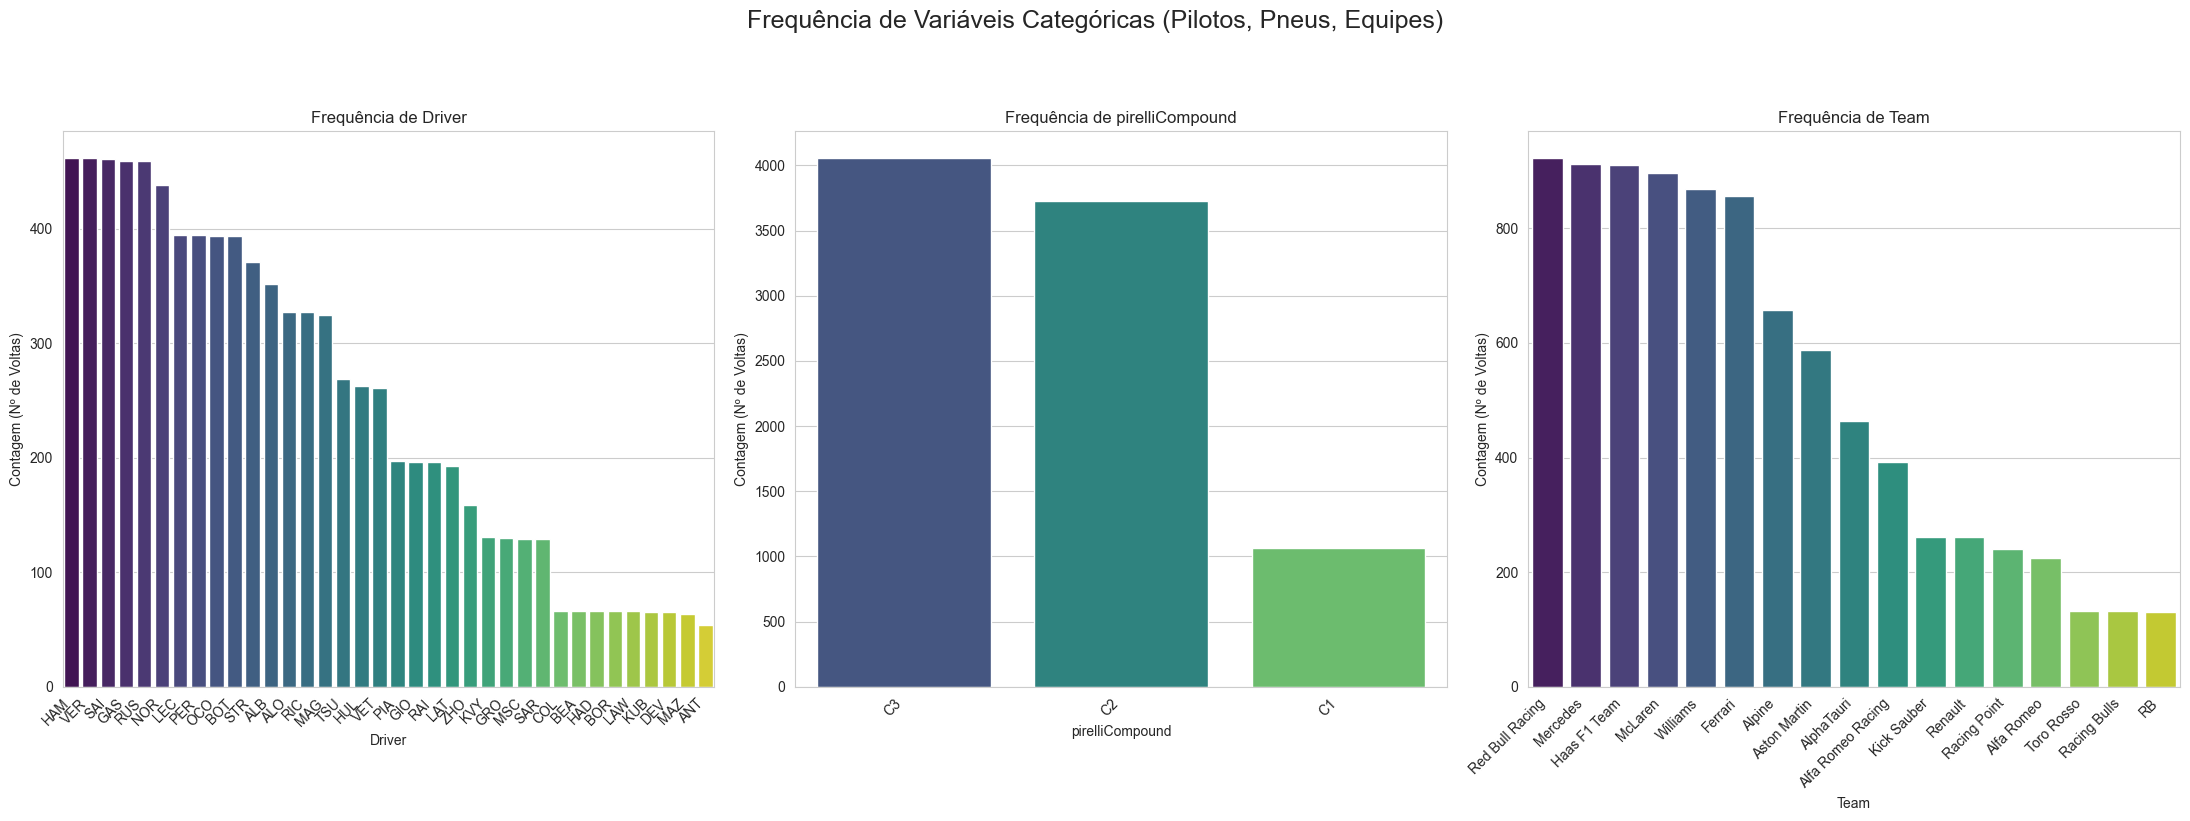

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cat_cols = ['Driver', 'pirelliCompound', 'Team']

print("Gerando gráficos de frequência (Countplots) para variáveis categóricas...")

sns.set_style("whitegrid")

n_rows_cat = 1
n_cols_cat = 3
fig_cat, axes_cat = plt.subplots(n_rows_cat, n_cols_cat, figsize=(22, 8)) 

flat_axes_cat = axes_cat.flatten()

for i, col in enumerate(cat_cols):
    ax = flat_axes_cat[i]
    
    data_to_plot = laps_with_weather[col].dropna()
    
    if data_to_plot.empty:
        ax.set_title(f'Frequência de {col} (Sem Dados)')
        ax.text(0.5, 0.5, 'Sem Dados', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_xticks([]); ax.set_yticks([])
    else:
        bar_order = data_to_plot.value_counts().index
        
        sns.countplot(x=data_to_plot, ax=ax, order=bar_order, palette="viridis")
        
        ax.set_title(f'Frequência de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Contagem (Nº de Voltas)')
        
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.suptitle('Frequência de Variáveis Categóricas (Pilotos, Pneus, Equipes)', fontsize=18, y=1.05)
plt.tight_layout(rect=[0, 0.03, 1, 0.99])

plot_filename_cat = 'categorical_frequency_plots.png'
plt.savefig(plot_filename_cat)
print(f"Gráficos de frequência salvos em: {plot_filename_cat}")

plt.show()

## Box Plots das Features Númericas

C:\Users\mpoli\AppData\Local\Temp\ipykernel_17084\3360847183.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_to_plot, ax=ax, palette="viridis")
C:\Users\mpoli\AppData\Local\Temp\ipykernel_17084\3360847183.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_to_plot, ax=ax, palette="viridis")
C:\Users\mpoli\AppData\Local\Temp\ipykernel_17084\3360847183.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data_to_plot, ax=ax, palette="viridis")
C:\Users\mpoli\AppData\Local\Temp\ipykernel_17084\3360847183.py:18: FutureWarni

Boxplots salvos em: numerical_boxplots.png


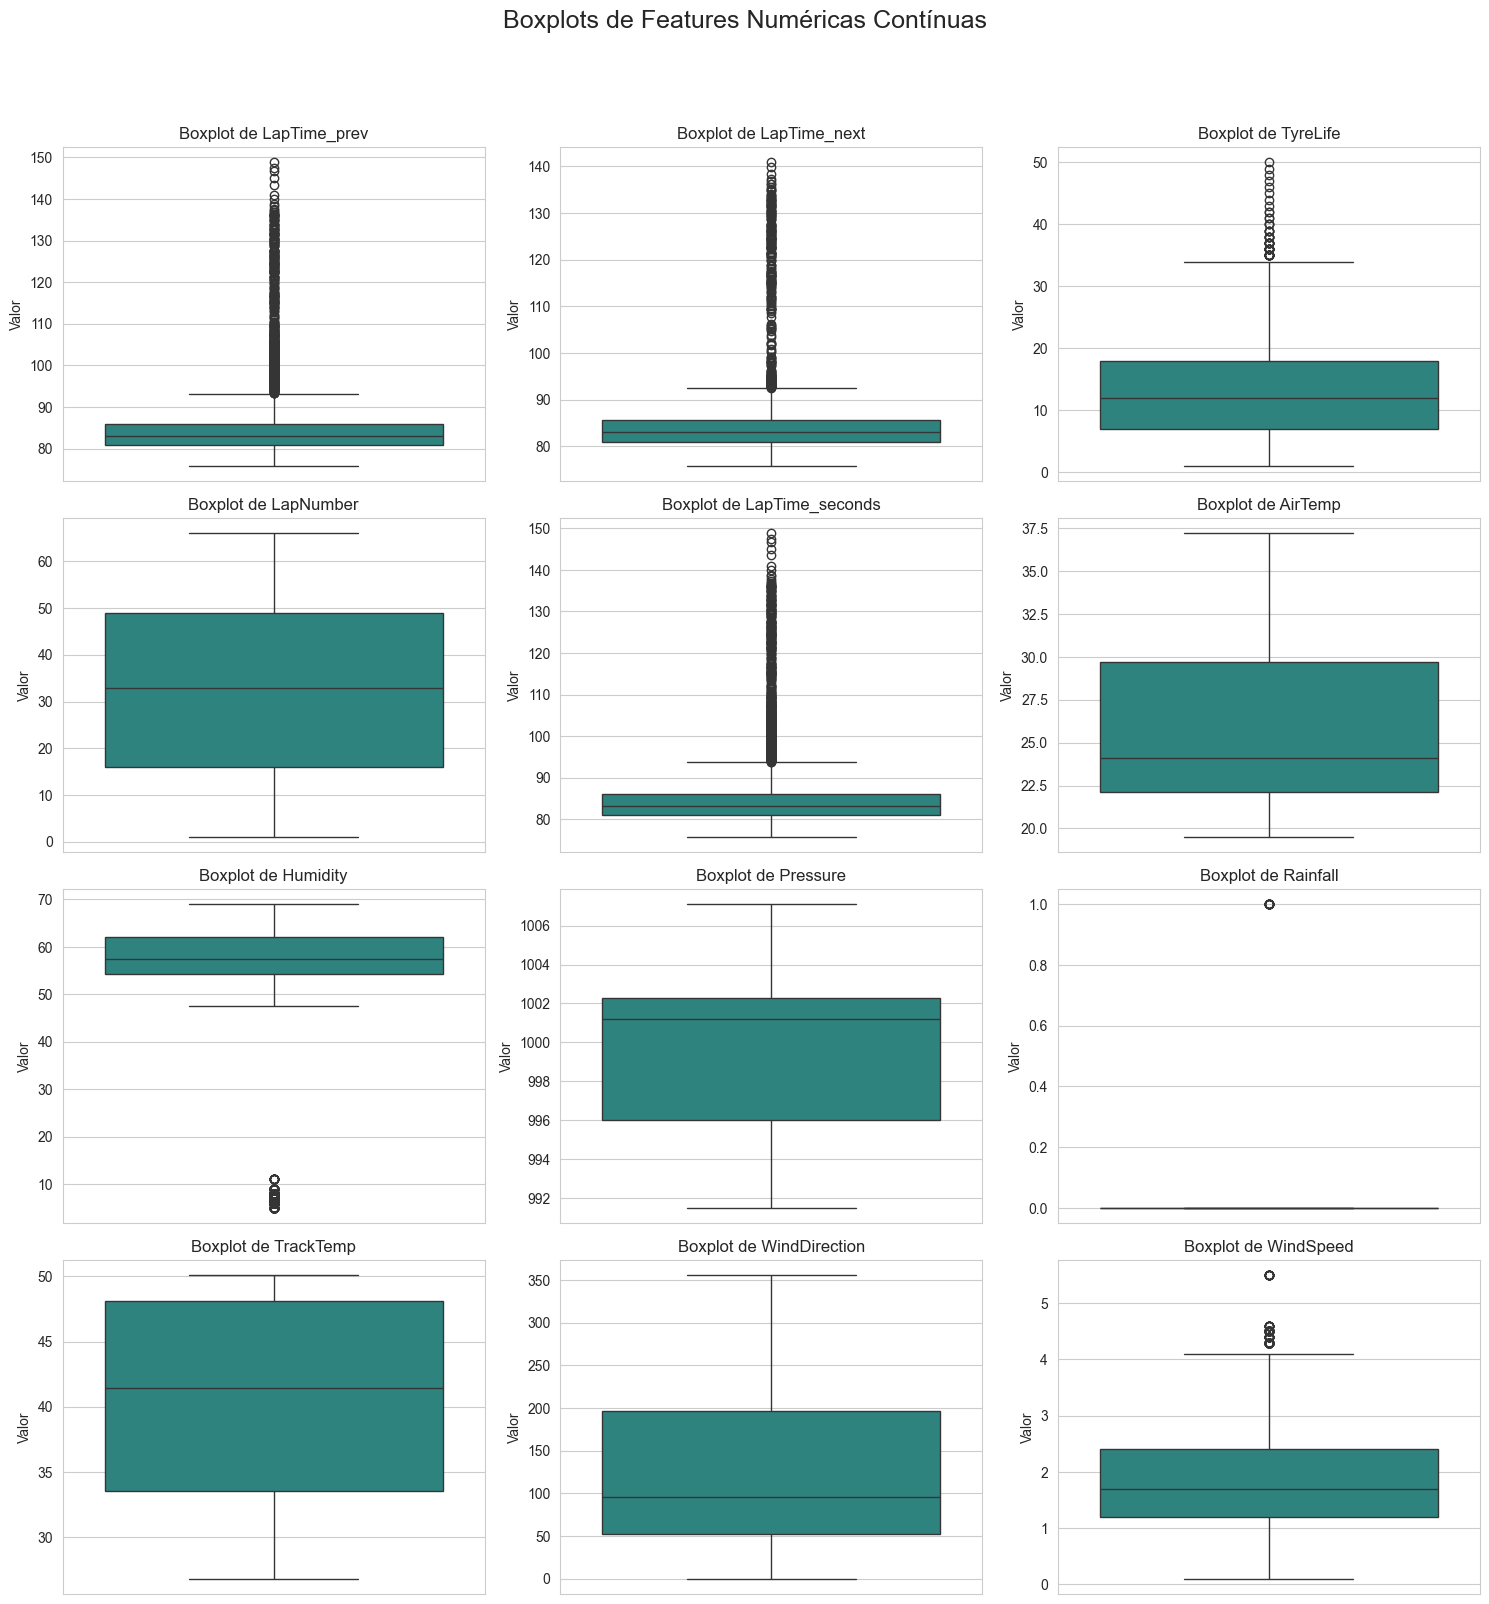

In [57]:
n_rows = 4
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 16))
flat_axes = axes.flatten()

sns.set_style("whitegrid")

for i, col in enumerate(continuous_cols):
    ax = flat_axes[i]
    
    data_to_plot = laps_with_weather[col].dropna()
    
    if data_to_plot.empty:
        ax.set_title(f'Boxplot de {col} (Sem Dados)')
        ax.text(0.5, 0.5, 'Sem Dados', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_xticks([]); ax.set_yticks([])
    else:
        sns.boxplot(y=data_to_plot, ax=ax, palette="viridis") 
        ax.set_title(f'Boxplot de {col}')
        ax.set_xlabel('') 
        ax.set_ylabel('Valor')
            
plt.suptitle('Boxplots de Features Numéricas Contínuas', fontsize=18, y=1.03)
plt.tight_layout(rect=[0, 0.03, 1, 0.99])

plot_filename = 'numerical_boxplots.png'
plt.savefig(plot_filename)
print(f"Boxplots salvos em: {plot_filename}")

plt.show()

## Construindo tabela de descrição das variavéis



In [58]:
try:
    stats_df = laps_with_weather.describe(include='all')

    features_interesse = [
    'LapTime_prev', 'LapTime_next', 'Stint', 'TyreLife', 'LapNumber', 'LapTime_seconds', 'Year',
    'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed', 'TrackStatus'
    ]

    skewness = laps_with_weather.skew(numeric_only=True)
    
    kurtosis = laps_with_weather.kurt(numeric_only=True)
    
    # Coeficiente de Variação (CV = std / mean)
    means = laps_with_weather.mean(numeric_only=True)
    stds = laps_with_weather.std(numeric_only=True)
    
    cv = np.where(means == 0, np.nan, stds / means)
    
    cv_series = pd.Series(cv, index=means.index)

    stats_df = stats_df[features_interesse]

    stats_df.loc['skewness'] = skewness
    stats_df.loc['kurtosis'] = kurtosis
    stats_df.loc['CV (Coef. Var)'] = cv_series


    print("\n--- Estatísticas ---")
    display(stats_df)
    

except Exception as e:
    print(f"Ocorreu um erro ao calcular as estatísticas: {e}")
    print("Verifique se o DataFrame 'laps_with_weather' existe e não está vazio.")


--- Estatísticas ---


,LapTime_prev,LapTime_next,Stint,TyreLife,LapNumber,LapTime_seconds,Year,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,TrackStatus
count,8409.000000,8408.000000,8852.000000,8852.000000,8852.000000,8845.000000,8852.000000,8851.000000,8851.000000,8851.000000,8851,8851.000000,8851.000000,8851.000000,8852
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,7
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,1
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8831,NaN,NaN,NaN,8403
mean,84.989951,84.312461,2.129010,12.848396,32.856417,85.135425,2021.990737,26.241848,51.816778,999.795402,NaN,41.220235,131.221331,1.795492,NaN
min,75.743000,75.743000,1.000000,1.000000,1.000000,75.743000,2019.000000,19.500000,5.000000,991.500000,NaN,26.800000,0.000000,0.100000,NaN
25%,80.963000,80.912000,1.000000,7.000000,16.000000,81.005000,2020.000000,22.100000,54.300000,996.000000,NaN,33.500000,52.000000,1.200000,NaN
50%,83.081000,83.003000,2.000000,12.000000,33.000000,83.206000,2022.000000,24.100000,57.500000,1001.200000,NaN,41.400000,96.000000,1.700000,NaN
75%,85.919000,85.567000,3.000000,18.000000,49.000000,86.156000,2024.000000,29.700000,62.000000,1002.300000,NaN,48.100000,197.000000,2.400000,NaN
max,148.794000,140.867000,5.000000,50.000000,66.000000,148.794000,2025.000000,37.200000,69.000000,1007.100000,NaN,50.100000,356.000000,5.500000,NaN


## Limiares da tabela

In [59]:
# Quais features da tabela têm:
# - skewness > 1
# - skewness < -1
# stats_df já foi calculado anteriormente
skewed_features = {
    'right_skewed': [],
    'left_skewed': []
}

for feature in stats_df.columns:
    skewness_value = stats_df.at['skewness', feature]
    if pd.notna(skewness_value):
        if skewness_value > 1:
            skewed_features['right_skewed'].append(feature)
        elif skewness_value < -1:
            skewed_features['left_skewed'].append(feature)

print("\n--- Features com Skewness Significativo ---")
print("Right Skewed (skewness > 1):", skewed_features['right_skewed'])
print("Left Skewed (skewness < -1):", skewed_features['left_skewed'])



--- Features com Skewness Significativo ---
Right Skewed (skewness > 1): ['LapTime_prev', 'LapTime_next', 'LapTime_seconds']
Left Skewed (skewness < -1): ['Humidity']


## Examinando Possíveis Outliners

Analisando 1066 voltas com o composto C1...


C:\Users\mpoli\AppData\Local\Temp\ipykernel_17084\966002839.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=c1_laps, x='Status_Pista', y='LapTime_seconds',
C:\Users\mpoli\AppData\Local\Temp\ipykernel_17084\966002839.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\mpoli\AppData\Local\Temp\ipykernel_17084\966002839.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=c1_laps, x='Stint_Cat', y='LapTime_seconds',


Gráficos de média salvos em: c1_average_analysis.png


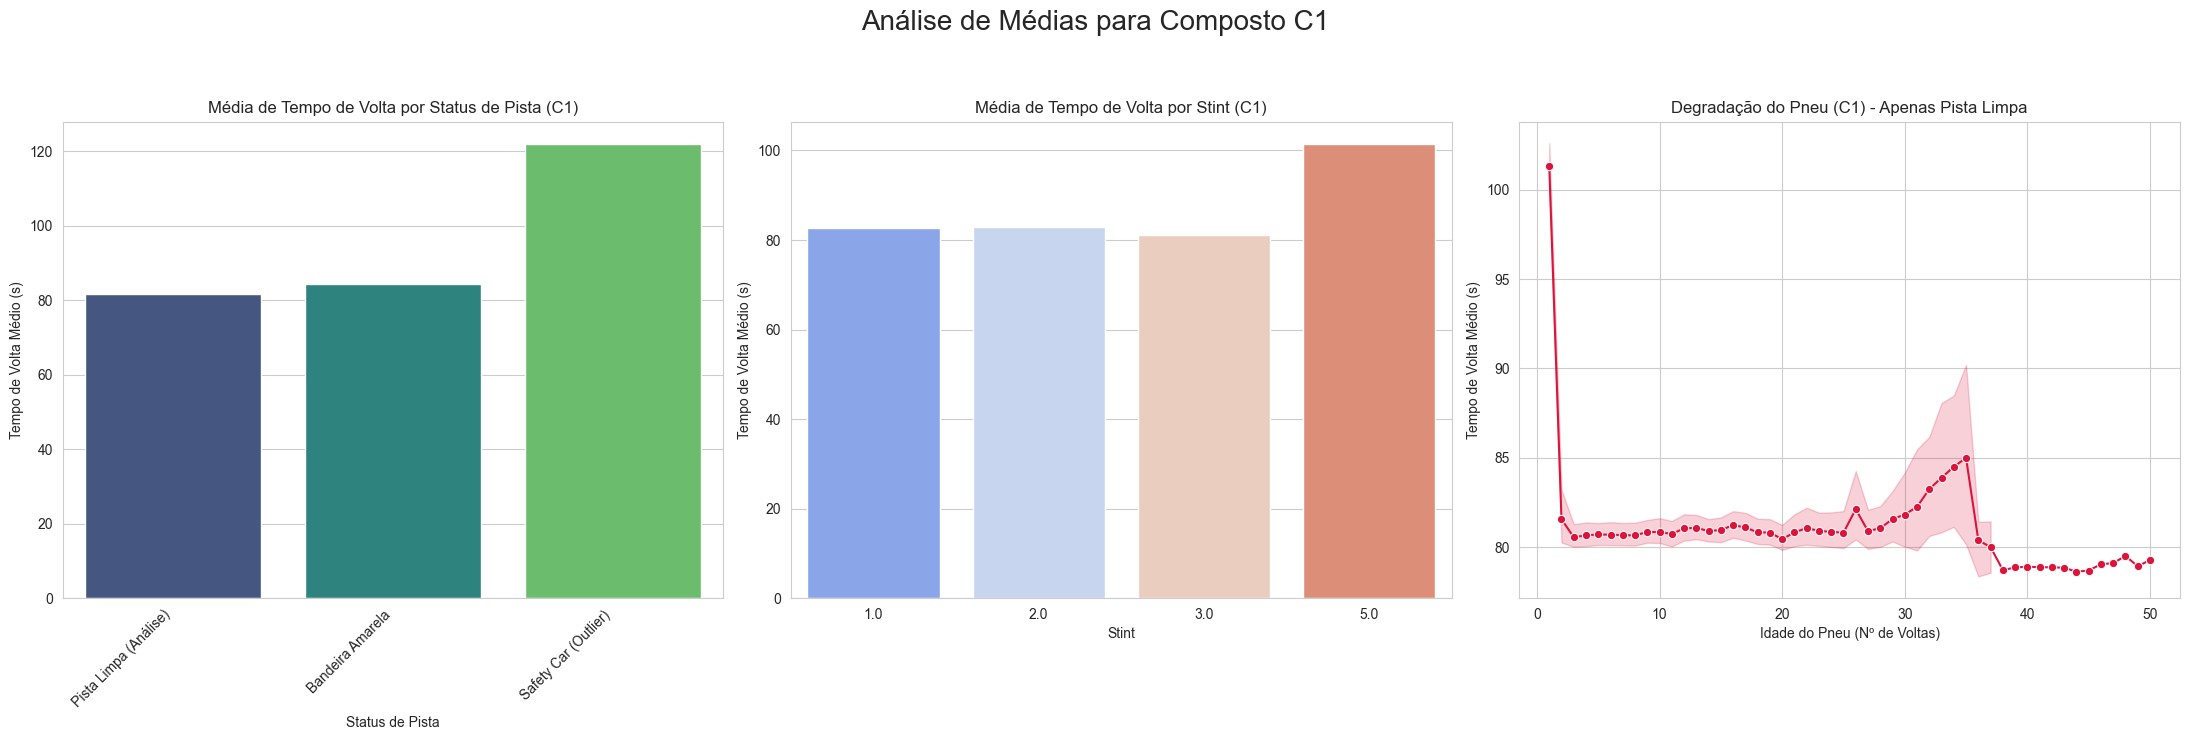

In [60]:
COMPOSTO_ALVO = 'C1' 
c1_laps = laps_with_weather[
    laps_with_weather['pirelliCompound'] == COMPOSTO_ALVO
].copy()

if c1_laps.empty:
    print(f"Nenhum dado encontrado para o composto '{COMPOSTO_ALVO}'.")
    print(f"Compostos disponíveis: {laps_with_weather['pirelliCompound'].unique()}")
else:
    print(f"Analisando {len(c1_laps)} voltas com o composto {COMPOSTO_ALVO}...")

    def mapear_status_pista(status_val):    
        if pd.isna(status_val):
            return 'Status Desconhecido'
        
        status_str = str(int(status_val)) 

        if '5' in status_str: 
            return 'Red Flag (Outlier)'
        if '4' in status_str: 
            return 'Safety Car (Outlier)'
        if '6' in status_str or '7' in status_str: 
            return 'VSC (Outlier)'
        
        if '2' in status_str: 
             return 'Bandeira Amarela'
            
        if status_str == '1': 
            return 'Pista Limpa (Análise)'
        
        return f'Outro ({status_str})'

    c1_laps['Status_Pista'] = c1_laps['TrackStatus'].apply(mapear_status_pista)
    
    c1_laps['Stint_Cat'] = c1_laps['Stint'].astype(str)
    
    # Define o estilo do gráfico
    sns.set_style("whitegrid")
    
    fig, axes = plt.subplots(1, 3, figsize=(22, 7))
    
    ax1 = axes[0]
    order1 = c1_laps.groupby('Status_Pista')['LapTime_seconds'].mean().sort_values().index
    sns.barplot(data=c1_laps, x='Status_Pista', y='LapTime_seconds', 
                ax=ax1, palette='viridis', order=order1, estimator=np.mean, errorbar=None)
    ax1.set_title(f'Média de Tempo de Volta por Status de Pista ({COMPOSTO_ALVO})')
    ax1.set_xlabel('Status de Pista')
    ax1.set_ylabel('Tempo de Volta Médio (s)')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    
    ax2 = axes[1]
    order2 = sorted(c1_laps['Stint_Cat'].unique())
    sns.barplot(data=c1_laps, x='Stint_Cat', y='LapTime_seconds', 
                ax=ax2, palette='coolwarm', order=order2, estimator=np.mean, errorbar=None)
    ax2.set_title(f'Média de Tempo de Volta por Stint ({COMPOSTO_ALVO})')
    ax2.set_xlabel('Stint')
    ax2.set_ylabel('Tempo de Volta Médio (s)')

    ax3 = axes[2]
    c1_laps_pista_limpa = c1_laps[c1_laps['Status_Pista'] == 'Pista Limpa (Análise)']
    
    if c1_laps_pista_limpa.empty:
        ax3.set_title(f'Degradação do Pneu ({COMPOSTO_ALVO}) - Sem dados de Pista Limpa')
        ax3.text(0.5, 0.5, 'Sem Dados', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)
    else:
        sns.lineplot(data=c1_laps_pista_limpa, x='TyreLife', y='LapTime_seconds', 
                     ax=ax3, color='crimson', marker='o', estimator=np.mean)
        ax3.set_title(f'Degradação do Pneu ({COMPOSTO_ALVO}) - Apenas Pista Limpa')
        ax3.set_xlabel('Idade do Pneu (Nº de Voltas)')
        ax3.set_ylabel('Tempo de Volta Médio (s)')

    plt.suptitle(f'Análise de Médias para Composto {COMPOSTO_ALVO}', fontsize=20, y=1.05)
    plt.tight_layout()
    
    plot_filename = 'c1_average_analysis.png'
    plt.savefig(plot_filename)
    print(f"Gráficos de média salvos em: {plot_filename}")


In [ ]:
print(f"Exibindo voltas do composto {COMPOSTO_ALVO} com TyreLife > 35")

filtro_idade = c1_laps['TyreLife'] > 35
voltas_long_run = c1_laps[filtro_idade].copy()

if voltas_long_run.empty:
    print(f"Nenhuma volta encontrada com TyreLife > 35 para o composto {COMPOSTO_ALVO}.")
else:
    colunas_display = [
        'Year', 
        'Driver', 
        'Team', 
        'Stint', 
        'LapNumber', 
        'TyreLife', 
        'LapTime_seconds', 
        'Status_Pista', 
        'TrackStatus' ,
    ]
    
    colunas_existentes_display = [col for col in colunas_display if col in voltas_long_run.columns]
    
    display(
        voltas_long_run[colunas_existentes_display].sort_values(by='TyreLife')
    )


Exibindo voltas do composto C1 com TyreLife > 35


,Year,Driver,Team,Stint,LapNumber,TyreLife,LapTime_seconds,Status_Pista,TrackStatus
7815,2023,LEC,Ferrari,3.0,52.0,36.0,78.357,Pista Limpa (Análise),1
8421,2024,BOT,Kick Sauber,3.0,64.0,36.0,81.325,Pista Limpa (Análise),1
8500,2024,MAG,Haas F1 Team,3.0,65.0,36.0,81.450,Pista Limpa (Análise),1
7886,2023,LEC,Ferrari,3.0,53.0,37.0,78.558,Pista Limpa (Análise),1
8497,2024,BOT,Kick Sauber,3.0,65.0,37.0,81.432,Pista Limpa (Análise),1
7945,2023,LEC,Ferrari,3.0,54.0,38.0,78.707,Pista Limpa (Análise),1
8015,2023,LEC,Ferrari,3.0,55.0,39.0,78.853,Pista Limpa (Análise),1
8078,2023,LEC,Ferrari,3.0,56.0,40.0,78.897,Pista Limpa (Análise),1
8146,2023,LEC,Ferrari,3.0,57.0,41.0,78.871,Pista Limpa (Análise),1
8220,2023,LEC,Ferrari,3.0,58.0,42.0,78.863,Pista Limpa (Análise),1


Podemos ver que o outliner do pneu C1 rápido com tyrelife alto é grande parte decorrente das voltas de Leclerc no GP de 2023. 
Fui em busca do resultado da corrida no site da Pirelli e pude observar que essa é uma inconsistência no dataset e provavelmente o erro, visto que a pirelli lista o pneu do terceiro stint dele como novo e no fast f1 ele já começa com um tyre life de 26, prejudicando a análise. 

In [62]:
import pandas as pd

laps_2023 = all_laps_data_by_year[2023]

print("Exibindo voltas de Charles Leclerc (LEC) de 2022...")

try:
    leclerc_laps_2023 = laps_2023[laps_2023['Driver'] == 'LEC'].copy()

    if leclerc_laps_2023.empty:
        print("Nenhuma volta encontrada para 'LEC' no DataFrame 'laps_2023'.")
        print("Verifique se a célula que cria 'laps_2023' foi executada.")
    else:
        colunas_display = [
            'Driver', 'Team', 'Stint', 'LapNumber', 'LapTime_seconds', 
            'TyreLife', 'pirelliCompound', 'TrackStatus', 
            'AirTemp', 'TrackTemp', 'Rainfall'
        ]
        
        colunas_existentes_display = [col for col in colunas_display if col in leclerc_laps_2023.columns]
        
        display(
            leclerc_laps_2023[colunas_existentes_display].sort_values(by=['Stint', 'LapNumber'])
        )

except NameError:
    print("Erro: O DataFrame 'laps_2023' não foi encontrado.")
    print("Por favor, execute a célula 'Análise para o Ano de 2023' primeiro.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Exibindo voltas de Charles Leclerc (LEC) de 2022...


,Driver,Team,Stint,LapNumber,LapTime_seconds,TyreLife,pirelliCompound,TrackStatus
660,LEC,Ferrari,1.0,1.0,95.790,1.0,C1,1
661,LEC,Ferrari,1.0,2.0,82.029,2.0,C1,1
662,LEC,Ferrari,1.0,3.0,81.469,3.0,C1,1
663,LEC,Ferrari,1.0,4.0,81.854,4.0,C1,1
664,LEC,Ferrari,1.0,5.0,81.631,5.0,C1,1
...,...,...,...,...,...,...,...,...
721,LEC,Ferrari,3.0,62.0,79.035,46.0,C1,1
722,LEC,Ferrari,3.0,63.0,79.096,47.0,C1,1
723,LEC,Ferrari,3.0,64.0,79.502,48.0,C1,1
724,LEC,Ferrari,3.0,65.0,78.922,49.0,C1,1


![Paradas do GP de 2023](1920_08-es23-pitstop-en.jpg)

Analisando transições de compostos entre stints...

--- Matriz de Contagem de Transição de Stints ---


To_Compound,C1,C2,C3
From_Compound,,,
C1,3,10,6
C2,22,23,77
C3,16,109,35



Gerando heatmap da matriz de transição...
Heatmap da matriz de transição salvo como: compound_transition_matrix.png


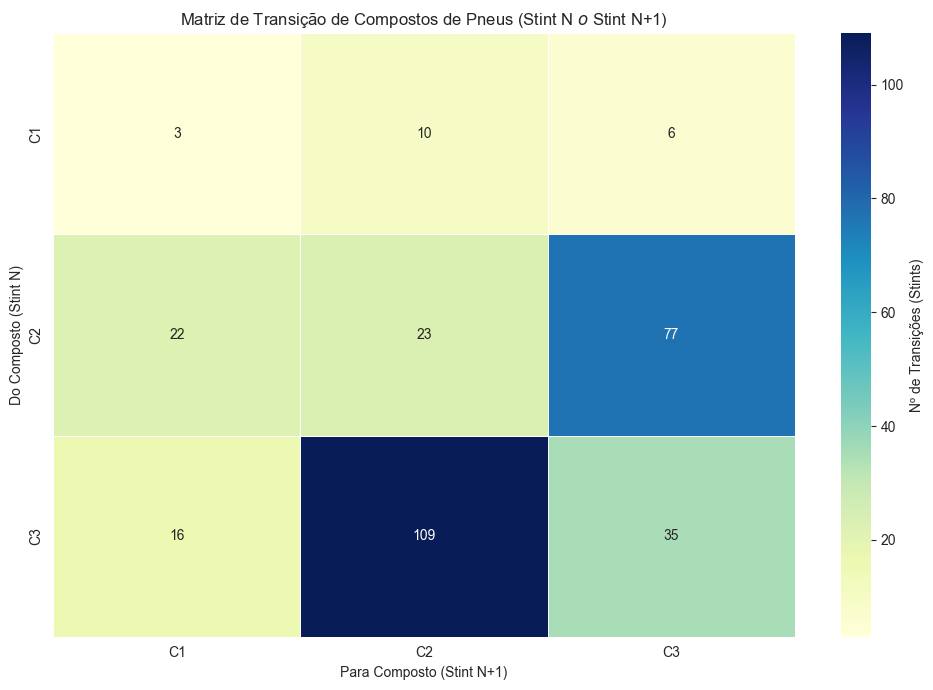

In [63]:
print("Analisando transições de compostos entre stints...")

try:

    stint_df = laps_with_weather[
        ['Year', 'Driver', 'Stint', 'pirelliCompound']
    ].drop_duplicates()
    
    stint_df = stint_df.sort_values(by=['Year', 'Driver', 'Stint'])

    stint_df['To_Compound'] = stint_df.groupby(['Year', 'Driver'])['pirelliCompound'].shift(-1)
    
    stint_df = stint_df.rename(columns={'pirelliCompound': 'From_Compound'})
    
    transitions_df = stint_df.dropna(subset=['To_Compound'])

    if transitions_df.empty:
        print("Não foi possível encontrar dados de transição (múltiplos stints) no DataFrame.")
    else:
        transition_matrix = pd.crosstab(
            transitions_df['From_Compound'], 
            transitions_df['To_Compound']
        )

        print("\n--- Matriz de Contagem de Transição de Stints ---")
        display(transition_matrix)

        print("\nGerando heatmap da matriz de transição...")
        plt.figure(figsize=(10, 7))
        
        ax = sns.heatmap(
            transition_matrix, 
            annot=True, 
            fmt="d",  
            cmap="YlGnBu", 
            linewidths=.5,
            cbar_kws={'label': 'Nº de Transições (Stints)'}
        )
        
        ax.set_title('Matriz de Transição de Compostos de Pneus (Stint N $\to$ Stint N+1)')
        ax.set_xlabel('Para Composto (Stint N+1)')
        ax.set_ylabel('Do Composto (Stint N)')
        plt.tight_layout()
        
        plot_filename = 'compound_transition_matrix.png'
        plt.savefig(plot_filename)
        print(f"Heatmap da matriz de transição salvo como: {plot_filename}")

except NameError:
    print("Erro: O DataFrame 'laps_with_weather_filtered' não foi encontrado.")
    print("Por favor, execute a célula anterior que define este DataFrame.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

A maioria dos trabalhos da bibliografia escolhe não trabalhar com corridas chuvosas, focando em em corridas ideais.

Em termos da temperatura da pista, humidade e pressão, ocorre padronização dos dados ou normalização.

Uma derivação comum nas features de temperatura seria criar um delta de temperatura, combinando a diferença entre a temperatura de pista e do ar.
Também pode se criar um fator de degradação, que combina a vida do pneu e a temperatura de pista para entender o quanto ele se desgasta. Um pneu de 25 voltas a 50 graus é muito pior que um pneu de 20 voltas a 25 graus.

In [67]:
# Remover as voltas do leclerc no terceiro stint de 2023
laps_with_weather = laps_with_weather[~((laps_with_weather['Year'] == 2023) & 
                                               (laps_with_weather['Driver'] == 'LEC') &
                                               (laps_with_weather['Stint'] == 3))].copy()

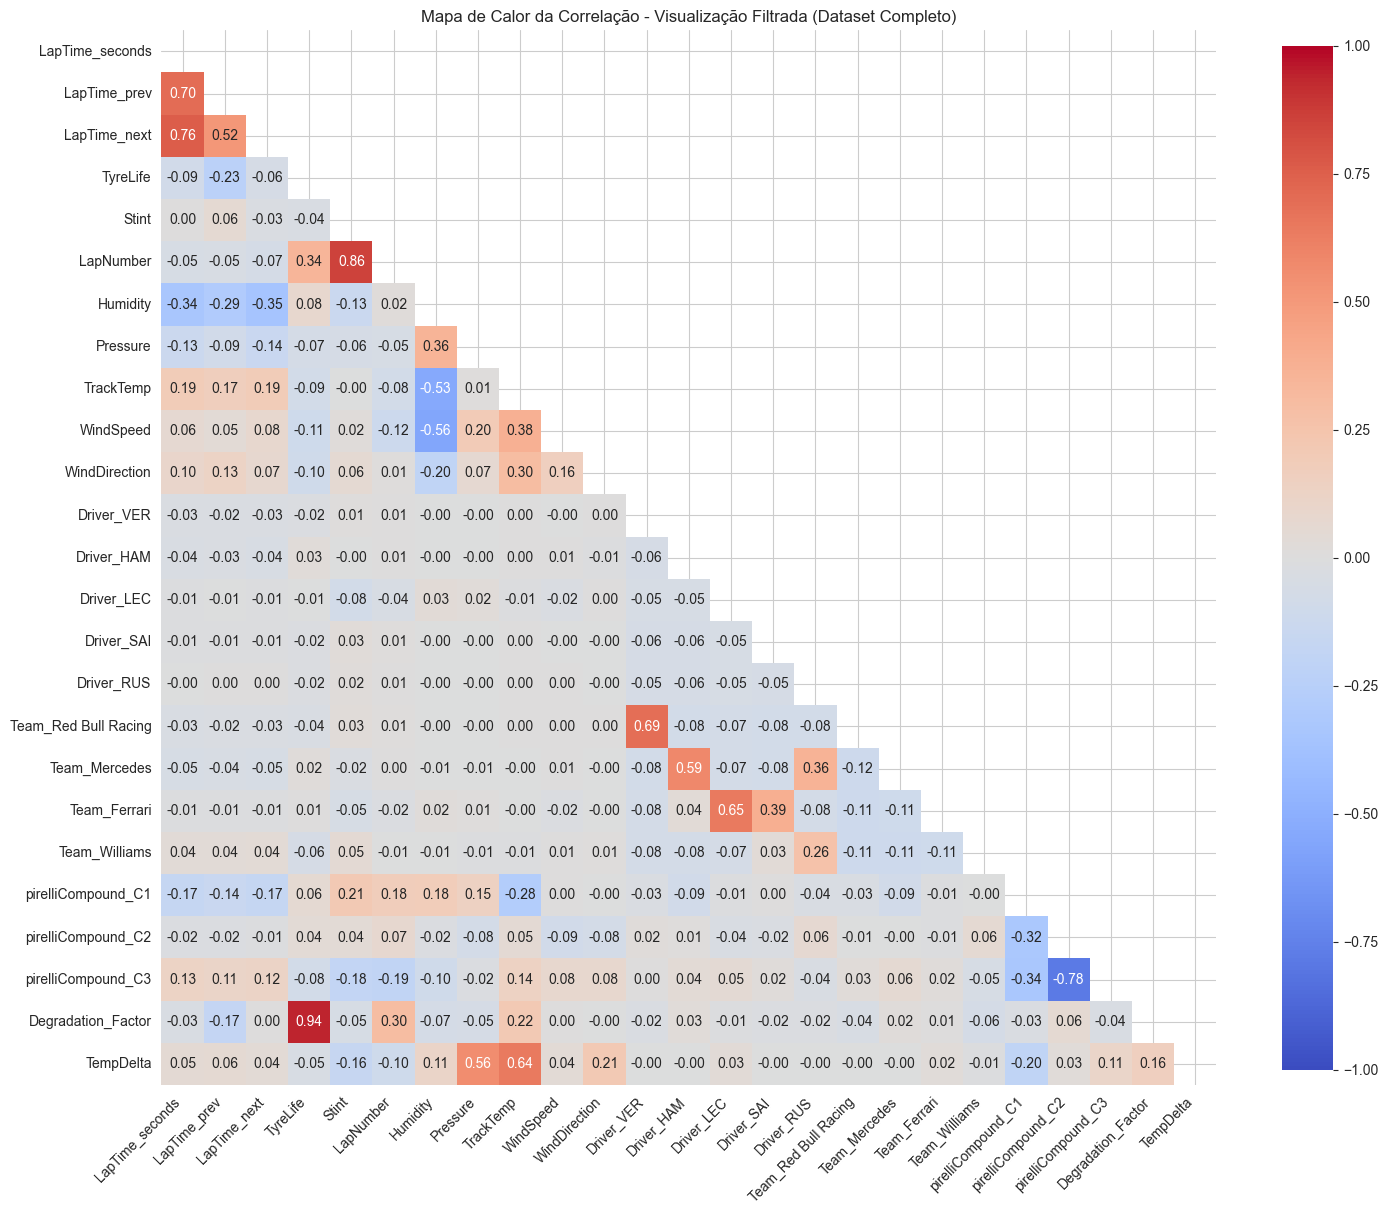

In [68]:
laps_with_weather['TempDelta'] = laps_with_weather['TrackTemp'] - laps_with_weather['AirTemp']
laps_with_weather['Degradation_Factor'] = laps_with_weather['TyreLife'] * laps_with_weather['TrackTemp']

drivers_filter = ['VER', 'HAM', 'LEC', 'SAI', 'RUS']
teams_filter = ['Red Bull Racing', 'Mercedes', 'Ferrari', 'Williams']


num_cols = [
    'LapTime_seconds', 'LapTime_prev', 'LapTime_next', 'Stint', 'TyreLife', 'LapNumber', 'Year', 
    'Humidity', 'Pressure','WindDirection', 'WindSpeed','TrackStatus', 'TempDelta', 'Degradation_Factor', 'TrackTemp'
]

cat_cols = ['Driver', 'pirelliCompound', 'Team']

cat_dummies = pd.get_dummies(laps_with_weather[cat_cols], prefix=cat_cols)

num_df = laps_with_weather[num_cols].copy()
corr_df_full = pd.concat([num_df, cat_dummies], axis=1)

corr_df_clean = corr_df_full.dropna()

if corr_df_clean.empty or corr_df_clean.shape[1] <= 1:
    print("Nenhum dado completo disponível para gerar a matriz de correlação.")
else:
    corr_matrix = corr_df_clean.corr(method='pearson')
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    cols_to_display = [
        'LapTime_seconds', 'LapTime_prev', 'LapTime_next', 'TyreLife', 'Stint', 'LapNumber',
        'Humidity','Pressure', 'TrackTemp', 'WindSpeed', 'WindDirection', 'Rainfall',
        'Driver_VER', 'Driver_HAM', 'Driver_LEC', 'Driver_SAI', 'Driver_RUS',
        'Team_Red Bull Racing', 'Team_Mercedes', 'Team_Ferrari', 'Team_Williams', 'pirelliCompound_C1', 'pirelliCompound_C2', 
        'pirelliCompound_C3', 'pirelliCompound_C4', 'pirelliCompound_INTERMEDIATE',
        'pirelliCompound_WET', 'Degradation_Factor', 'TempDelta'
    ]

    # Filtra apenas as colunas que realmente existem no dataset
    cols_to_display = [c for c in cols_to_display if c in corr_matrix.columns]
    corr_subset = corr_matrix.loc[cols_to_display, cols_to_display]

    plt.figure(figsize=(max(10, len(cols_to_display)*0.6), max(6, len(cols_to_display)*0.6)))
    ax = sns.heatmap(
        corr_subset, annot=True, cmap='coolwarm', fmt='.2f',
        vmin=-1, vmax=1, cbar_kws={'shrink':0.7}, square=True, mask=np.triu(np.ones_like(corr_subset, dtype=bool))
    )

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    plt.title('Mapa de Calor da Correlação - Visualização Filtrada (Dataset Completo)')
    plt.tight_layout()
    plt.show()



## PCA

Iniciando preparação de dados para PCA e Clustering...
Dataset pronto para ML. Shape: (8827, 72)

--- Executando PCA ---
Gráfico de variância do PCA salvo como: pca_variance_plot_v2.png


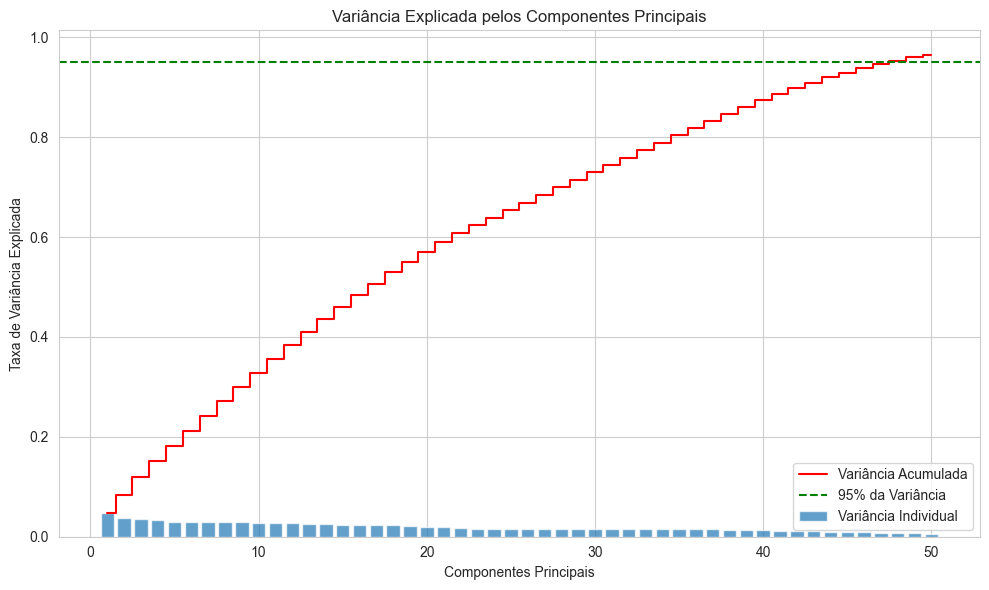

Usando 48 componentes do PCA para o K-Means.

--- Executando Análise de Silhueta para encontrar K ótimo ---
Para K = 2, Score de Silhueta = 0.0656
Para K = 3, Score de Silhueta = 0.0438
Para K = 4, Score de Silhueta = 0.0520
Para K = 5, Score de Silhueta = 0.0558
Para K = 6, Score de Silhueta = 0.0683
Para K = 7, Score de Silhueta = 0.0872
Para K = 8, Score de Silhueta = 0.0951
Para K = 9, Score de Silhueta = 0.1110
Para K = 10, Score de Silhueta = 0.1413
Para K = 11, Score de Silhueta = 0.1389
Para K = 12, Score de Silhueta = 0.1435
Para K = 13, Score de Silhueta = 0.1596
Para K = 14, Score de Silhueta = 0.1580
Para K = 15, Score de Silhueta = 0.1733
Para K = 16, Score de Silhueta = 0.1910
Para K = 17, Score de Silhueta = 0.1937
Para K = 18, Score de Silhueta = 0.2108
Para K = 19, Score de Silhueta = 0.2229
Para K = 20, Score de Silhueta = 0.2253
Para K = 21, Score de Silhueta = 0.2444
Para K = 22, Score de Silhueta = 0.2631
Para K = 23, Score de Silhueta = 0.2751
Para K = 24, Score d

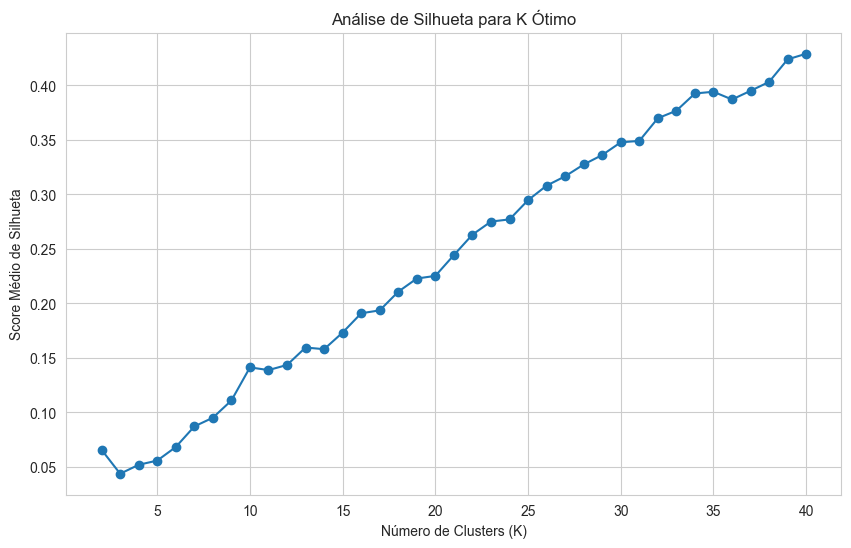

K ótimo encontrado (maior score): 40

--- Executando K-Means final com 40 traços ---

--- Centróides dos Traços (Perfil Médio de cada Cluster) ---


,LapTime_seconds,TyreLife,LapNumber,Stint,TrackTemp,TempDelta,TrackStatus
Cluster,,,,,,,
0,86.40,14.19,33.11,2.18,40.24,16.09,1.92
1,85.17,12.28,33.22,2.19,41.31,14.96,1.57
2,84.68,12.32,32.15,2.14,41.42,14.79,1.49
3,85.76,14.37,32.97,2.26,41.58,15.01,1.41
4,85.03,13.21,28.91,1.76,44.65,18.70,1.30
5,84.84,13.01,33.14,2.13,40.30,13.47,1.51
6,85.24,12.22,33.24,2.22,41.30,15.00,1.65
7,86.69,13.84,33.17,1.78,40.24,16.10,2.08
8,84.17,12.19,33.51,2.18,41.34,15.00,1.56


Gráfico de clusters (PCA) salvo como: pca_cluster_plot_with_centroids.png


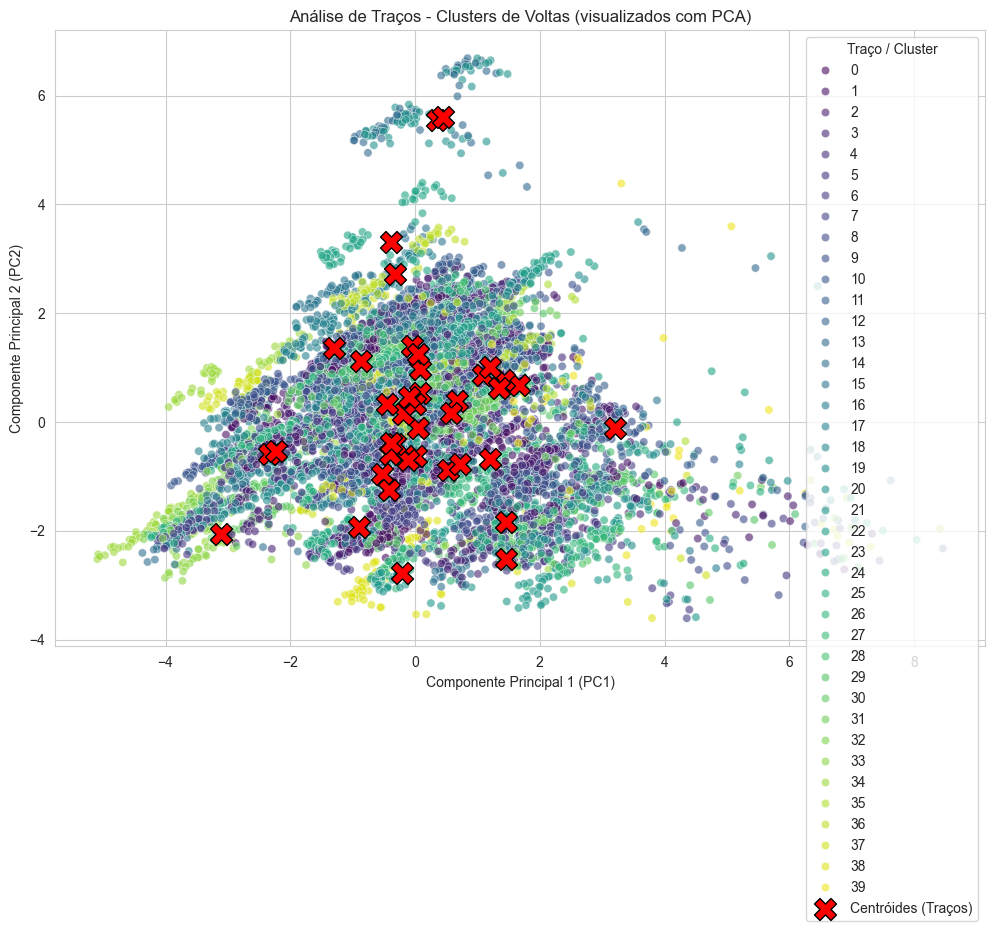

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn import metrics 
import time

try:
    print("Iniciando preparação de dados para PCA e Clustering...")
    
    num_cols = [
        'LapTime_seconds', 'LapTime_prev', 'LapTime_next', 'Stint', 'TyreLife', 'LapNumber', 'Year', 
        'Humidity', 'Pressure', 'WindSpeed', 'TrackStatus', 
        'TempDelta', 'TrackTemp',
    ]
    cat_cols = ['Driver', 'pirelliCompound', 'Team']


    cat_dummies = pd.get_dummies(laps_with_weather[cat_cols], prefix=cat_cols, dummy_na=True)
    num_df = laps_with_weather[num_cols].copy()
    ml_df_full = pd.concat([num_df, cat_dummies], axis=1)

    imputer_num = SimpleImputer(strategy='mean')
    ml_df_imputed_num = imputer_num.fit_transform(ml_df_full[num_cols])
    num_df_imputed = pd.DataFrame(ml_df_imputed_num, columns=num_cols, index=ml_df_full.index)
    ml_df_imputed_analysis = pd.concat([num_df_imputed, cat_dummies], axis=1)
    
    scaler = StandardScaler()
    ml_df_scaled = scaler.fit_transform(ml_df_imputed_analysis)
    
    print(f"Dataset pronto para ML. Shape: {ml_df_scaled.shape}")

    print("\n--- Executando PCA ---")
    pca = PCA()
    pca.fit(ml_df_scaled)
    
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)

    plt.figure(figsize=(10, 6))
    num_components_to_plot = min(50, len(cumulative_variance))
    plt.bar(range(1, num_components_to_plot + 1), explained_variance_ratio[:num_components_to_plot], alpha=0.7, align='center', label='Variância Individual')
    plt.step(range(1, num_components_to_plot + 1), cumulative_variance[:num_components_to_plot], where='mid', label='Variância Acumulada', color='red')
    plt.axhline(y=0.95, color='g', linestyle='--', label='95% da Variância')
    plt.ylabel('Taxa de Variância Explicada'); plt.xlabel('Componentes Principais')
    plt.title('Variância Explicada pelos Componentes Principais'); plt.legend(loc='best')
    plt.grid(True); plt.tight_layout()
    plot_filename_pca = 'pca_variance_plot_v2.png'
    plt.savefig(plot_filename_pca)
    print(f"Gráfico de variância do PCA salvo como: {plot_filename_pca}")
    plt.show()

    n_components_95_idx = np.where(cumulative_variance >= 0.95)[0]
    if n_components_95_idx.size > 0:
        n_components_95 = n_components_95_idx[0] + 1
    else:
        n_components_95 = len(cumulative_variance)
        
    print(f"Usando {n_components_95} componentes do PCA para o K-Means.")
    data_pca = pca.transform(ml_df_scaled)[:, :n_components_95]

    print("\n--- Executando Análise de Silhueta para encontrar K ótimo ---")
    lsilhouette = []
    lknumber = range(2, 41)
    
    for k in lknumber:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        
        kmeans.fit(data_pca) 
        
        cluster_labels = kmeans.labels_
        
        # CORREÇÃO: Calcular silhueta no data_pca
        silhouette_avg = metrics.silhouette_score(data_pca, cluster_labels)
        lsilhouette.append(silhouette_avg)
        
        print(f"Para K = {k}, Score de Silhueta = {silhouette_avg:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(lknumber, lsilhouette, marker='o')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Score Médio de Silhueta')
    plt.title('Análise de Silhueta para K Ótimo')
    plt.grid(True)
    plot_filename_silhouette = 'silhouette_analysis.png'
    plt.savefig(plot_filename_silhouette)
    print(f"Gráfico de silhueta salvo como: {plot_filename_silhouette}")
    plt.show()

    best_k = lknumber[np.argmax(lsilhouette)]
    print(f"K ótimo encontrado (maior score): {best_k}")

    print(f"\n--- Executando K-Means final com {best_k} traços ---")
    
    n_clusters = best_k 
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(data_pca)
    
    ml_df_imputed_analysis['Cluster'] = clusters
    
    print("\n--- Centróides dos Traços (Perfil Médio de cada Cluster) ---")
    centroid_cols = [
        'LapTime_seconds', 'TyreLife', 'LapNumber', 'Stint', 
        'TrackTemp', 'TempDelta', 'TrackStatus'
    ]
    centroid_cols_exist = [c for c in centroid_cols if c in ml_df_imputed_analysis.columns]
    
    cluster_centroids = ml_df_imputed_analysis.groupby('Cluster')[centroid_cols_exist].mean()
    display(cluster_centroids.round(2))

    # --- 7. PLOTAR OS CLUSTERS (Visualização estilo Professor) ---
    data_pca_2d = pca.transform(ml_df_scaled)[:, :2]
    centroids_pca = kmeans.cluster_centers_

    plt.figure(figsize=(12, 8))
    ax = sns.scatterplot(
        x=data_pca_2d[:, 0], 
        y=data_pca_2d[:, 1], 
        hue=clusters, 
        palette=sns.color_palette("viridis", n_clusters),
        alpha=0.6,
        legend='full'
    )
    
    ax.scatter(
        centroids_pca[:, 0], 
        centroids_pca[:, 1], 
        marker='X', s=250, c='red',             
        edgecolor='black', label='Centróides (Traços)',
        zorder=10            
    )
    
    plt.xlabel('Componente Principal 1 (PC1)')
    plt.ylabel('Componente Principal 2 (PC2)')
    plt.title('Análise de Traços - Clusters de Voltas (visualizados com PCA)')
    plt.grid(True)
    plt.legend(title='Traço / Cluster')
    plot_filename_clusters = 'pca_cluster_plot_with_centroids.png'
    plt.savefig(plot_filename_clusters)
    print(f"Gráfico de clusters (PCA) salvo como: {plot_filename_clusters}")
    plt.show()

except NameError as e:
    print(f"ERRO: DataFrame 'laps_with_weather' não foi encontrado ({e}).")
    print("Por favor, execute a célula que carrega e processa os dados de UMA corrida primeiro (a que cria 'laps_with_weather').")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

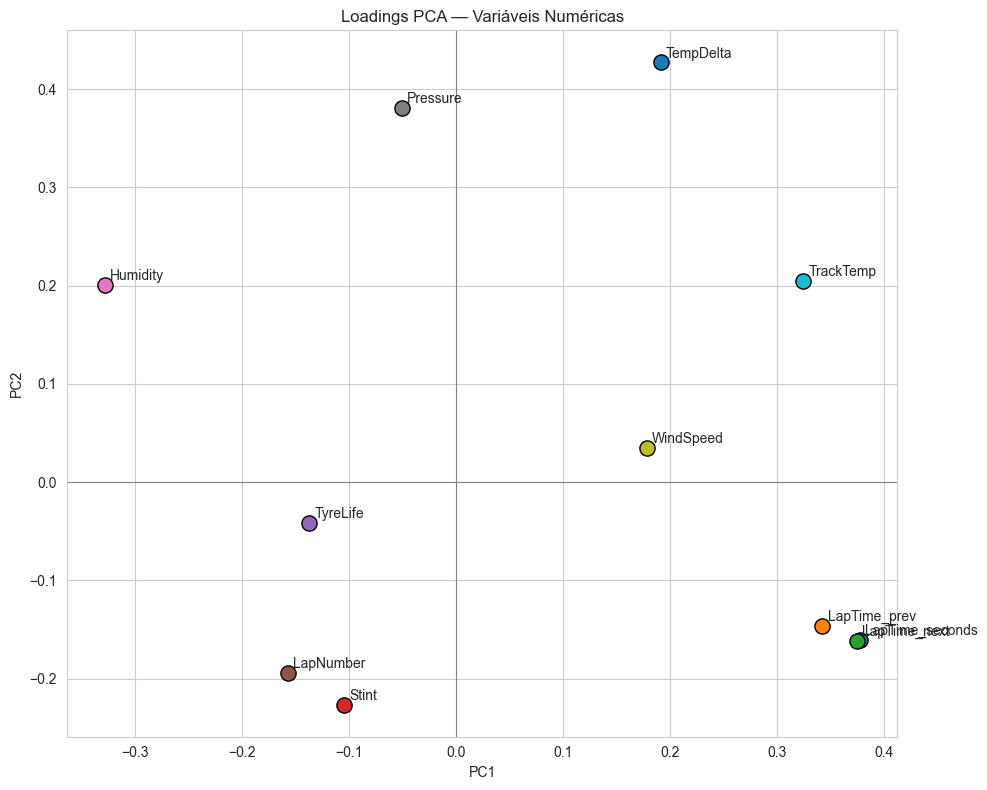

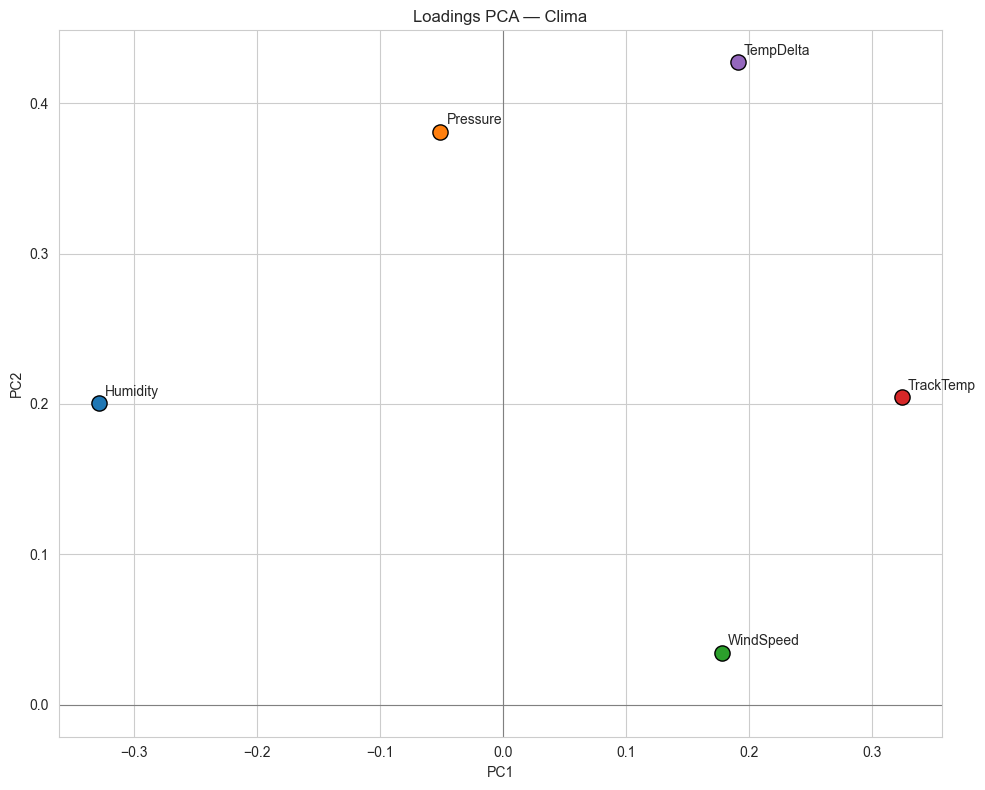

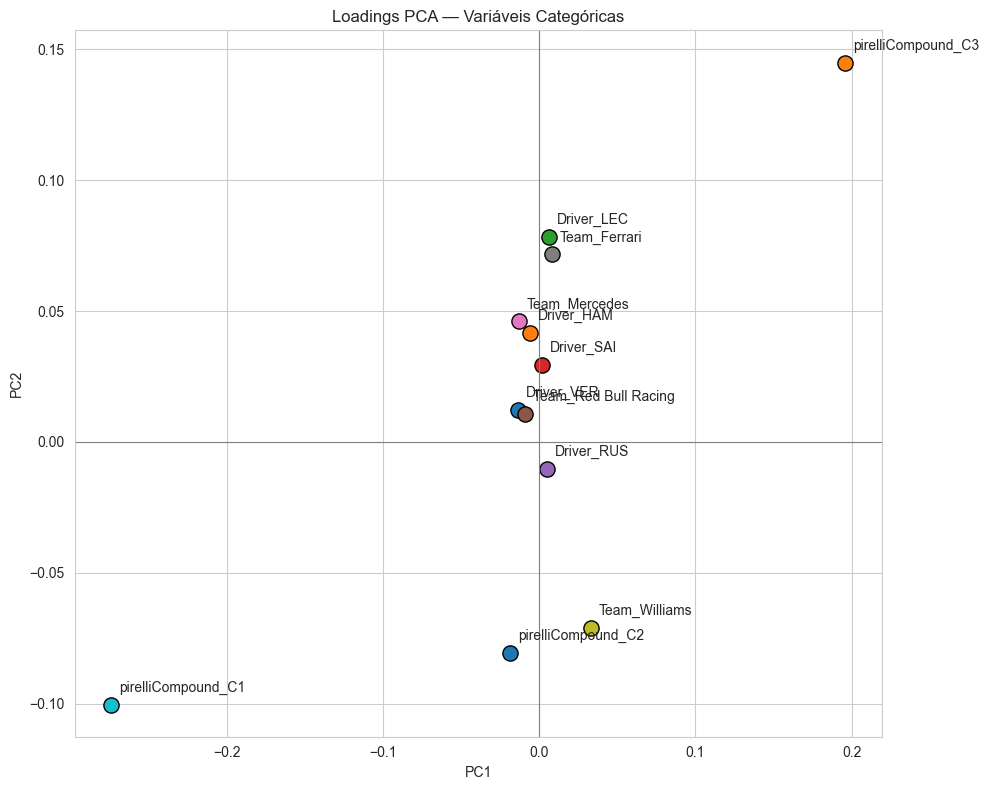

In [ ]:
def plot_pca_loadings_subset(pca, feature_list, full_feature_list, title):

    # Loadings completos (todas features)
    loadings = pca.components_.T
    pc1 = loadings[:, 0]
    pc2 = loadings[:, 1]

    # ÍNDICES das features desejadas no conjunto total
    idx = [full_feature_list.get_loc(feat) for feat in feature_list]

    plt.figure(figsize=(10, 8))
    plt.axhline(0, color='gray', linewidth=0.8)
    plt.axvline(0, color='gray', linewidth=0.8)

    for i in idx:
        plt.scatter(pc1[i], pc2[i], s=120, edgecolor='black')
        plt.text(pc1[i] + 0.005, pc2[i] + 0.005,
                 full_feature_list[i], fontsize=10)

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

numeric_features = [
    'LapTime_seconds','LapTime_prev','LapTime_next','Stint','TyreLife',
    'LapNumber','Humidity','Pressure','WindSpeed','TrackTemp','TempDelta'
]
feature_names = ml_df_imputed_analysis.columns

plot_pca_loadings_subset(
    pca,
    numeric_features,
    feature_names,
    title="Loadings PCA — Variáveis Numéricas"
)

weather_features = [
    'Humidity', 'Pressure', 'WindSpeed', 'TrackTemp', 'TempDelta'
]

plot_pca_loadings_subset(
    pca,
    weather_features,
    feature_names,
    title="Loadings PCA — Clima"
)


categoric_features =[
    'Driver_VER', 'Driver_HAM', 'Driver_LEC', 'Driver_SAI', 'Driver_RUS',
    'Team_Red Bull Racing', 'Team_Mercedes', 'Team_Ferrari', 'Team_Williams',
    'pirelliCompound_C1', 'pirelliCompound_C2', 'pirelliCompound_C3'
]

plot_pca_loadings_subset(
    pca,
    categoric_features,
    feature_names,
    title="Loadings PCA — Variáveis Categóricas"
)



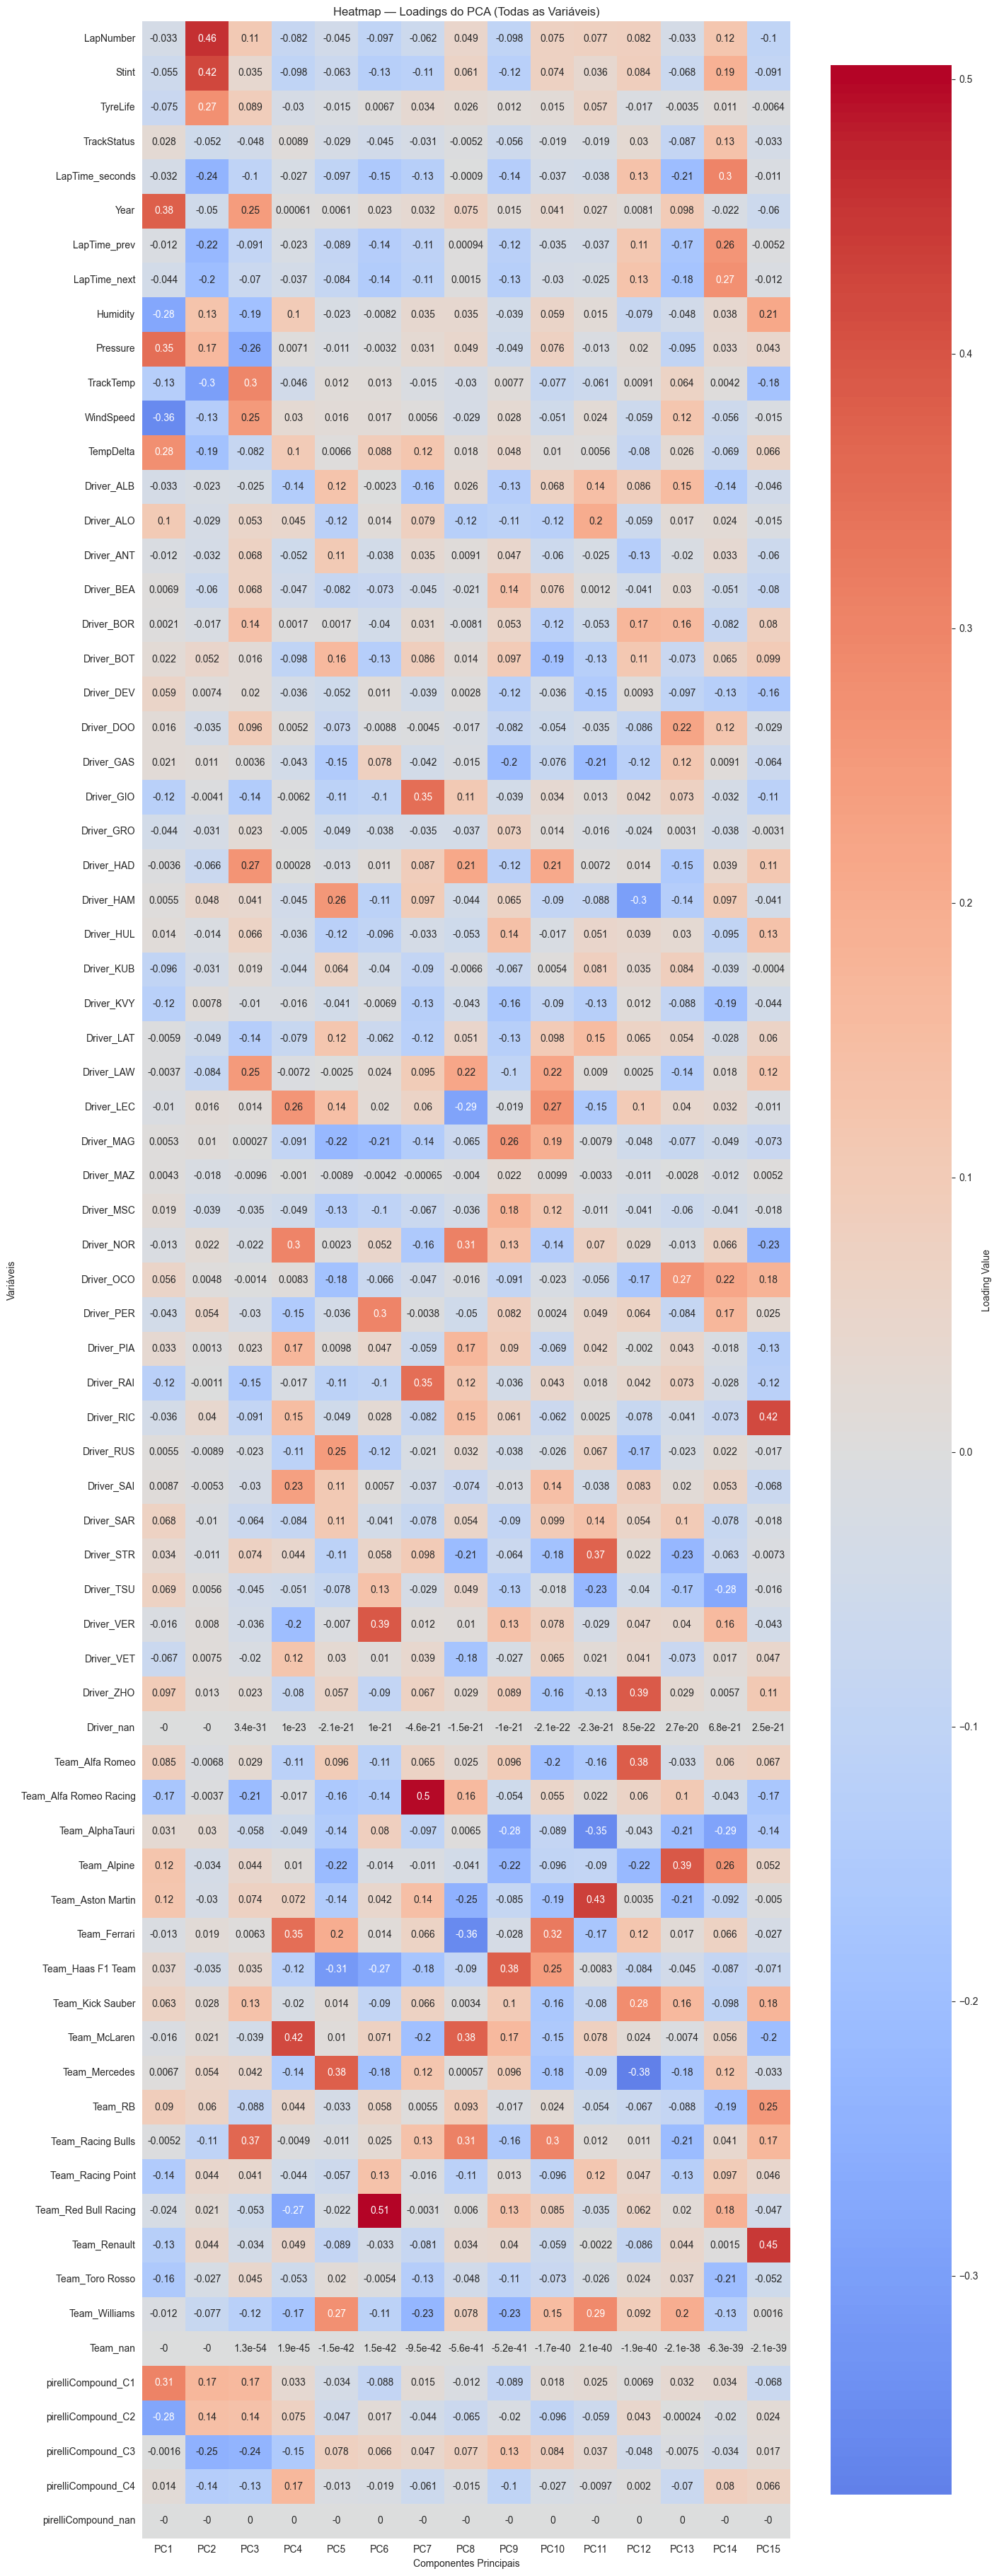

In [ ]:
# loadings do PCA
loadings = pca.components_.T  

# número de PCs a exibir
num_pcs_to_plot = min(15, loadings.shape[1])
loadings_subset = loadings[:, :num_pcs_to_plot]

# remover a coluna 'Cluster'
features_for_pca = ml_df_imputed_analysis.columns.drop("Cluster")

loading_df = pd.DataFrame(
    loadings_subset,
    index=features_for_pca,
    columns=[f"PC{i+1}" for i in range(num_pcs_to_plot)]
)

plt.figure(figsize=(14, 0.5 * len(loading_df)))
sns.heatmap(
    loading_df,
    cmap="coolwarm",
    center=0,
    cbar_kws={'label': 'Loading Value'},
    annot=True,
)
plt.title("Heatmap — Loadings do PCA (Todas as Variáveis)")
plt.xlabel("Componentes Principais")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()
